<a href="https://colab.research.google.com/github/ajaythakur3369/AlmaBetter-Internship/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Online Retail Customer Segmentation**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - AlmaBetter**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/AlmaBetter-Internship)**

# **Project Summary -**

#### In this project, our task was to identify major customer segments in a UK-based online retail store's one-year historical transaction dataset. This segmentation would aid the company in marketing decisions and strategy by allowing them to target specific customer groups effectively. In today's competitive landscape, effective decision-making is essential for revenue generation. Utilizing data and employing machine learning techniques can help identify target groups within large datasets, providing insights into customer characteristics and preferences.
#### After basic data exploration and cleaning, including the removal of duplicates and null values, we delved into the RFM (Recency, Frequency, Monetary) analysis. This analysis segments customers into homogeneous groups based on their purchasing behavior. We utilized various unsupervised machine learning algorithms such as KMeans Clustering and Hierarchical Clustering (Agglomerative Clustering) to perform segmentation. To determine the optimal number of clusters, we employed methods like the Elbow method, Silhouette Score, and Silhouette Plot.
#### RFM analysis is a powerful tool for quick segmentation, but its effectiveness can be enhanced by incorporating additional factors such as demographic information and product details. Scaling and normalization of data were performed to ensure consistency across different units. We applied clustering algorithms like K-Means and Hierarchical Clustering, visualizing the results with different numbers of clusters.
#### We started with simple segmentation models based on binning and quantiles, gradually moving to more complex models to gain deeper insights into the data. While K-Means clustering provides valuable insights, it's important to note that there's no guarantee of finding the global best solution. Therefore, we also explored Hierarchical Clustering to complement our analysis.
#### By effectively segmenting customers and understanding their behavior, businesses can tailor their marketing strategies to maximize profitability while minimizing costs. Continuous refinement and analysis of segmentation models can further enhance the effectiveness of marketing plans, ultimately leading to increased profitability for the business.




# **Problem Statement -**
#### Customer segmentation is a widely adopted technique in e-commerce retail companies, aiming to enhance both the top line and bottom line of the business. By segmenting customers, companies can gain insights into their preferences and behaviors, enabling targeted marketing strategies to maximize the value of each customer.

#### The primary objectives of customer segmentation include understanding customer preferences, purchase frequency, timing of purchases, seasonal trends, and popular products. By identifying major customer segments, companies can tailor their marketing efforts to better meet the needs of different customer groups.
#### In this project, our goal is to identify major customer segments using a transnational dataset containing all transactions between 01/12/2010 and 09/12/2011 for a UK-based online retail store specializing in unique all-occasion gifts. Many customers of the company are wholesalers, making it crucial to understand their purchasing patterns and preferences.


# **General Guidelines -**

Well-structured, formatted, and commented code is essential for clarity and maintainability. Including exception handling, production-grade code, and deployment readiness can enhance the robustness and usability of the project, earning additional credits for students.

Exception handling ensures that the code can gracefully handle errors and unexpected situations, enhancing its reliability in real-world scenarios. Production-grade code adheres to industry standards and best practices, making it suitable for deployment in a production environment. Deployment-ready code should be executable without any errors, providing a seamless experience for users.

Each logic in the code should be thoroughly commented to explain its purpose and functionality, aiding understanding and future modifications.

For visualization, following the "UBM" rule can help create meaningful charts:

- Univariate Analysis: Explore individual variables to understand their distributions and characteristics.
- Bivariate Analysis: Examine relationships between pairs of variables, such as numerical-categorical, numerical-numerical, and categorical-categorical.
- Multivariate Analysis: Investigate interactions between multiple variables to uncover complex patterns and dependencies.

Creating at least 15 logical and meaningful charts with important insights can provide valuable information for decision-making. Each chart should be accompanied by:

1. Chart visualization code.
2. Explanation of why the specific chart was chosen.
3. Insights derived from the chart.
4. Assessment of whether the gained insights will have a positive business impact or lead to negative growth, with specific justifications.

Including multiple machine learning algorithms for model creation allows for comparison and selection of the best-performing model. For each algorithm, explain its characteristics, performance using evaluation metric score charts, cross-validation, hyperparameter tuning, and any observed improvements.

Finally, discuss the business implications of each evaluation metric, highlighting how they indicate the model's effectiveness and potential impact on business outcomes.



















# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import scipy
import scipy.stats as stat
import math
import sklearn

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Libraries for hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [ ]:
# Accessing the Drive from Colab to obtain the required file
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Path to access the required file from Drive
df = pd.read_excel('/content/drive/MyDrive/Colab_Notebook/Internship_Name/AlmaBetter/File_Name/Sales_dataset.xlsx')

### Initial View of the Dataset

In [ ]:
# Initial dataset overview
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

### Number of rows and columns in the dataset

In [ ]:
# Number of rows and columns in the dataset
df.shape

(541909, 8)

#### There are 541,909 rows and 8 columns

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Count of duplicate values in the dataset
len(df.duplicated())

541909

#### Missing values or null values in the dataset

In [ ]:
# Count of missing values or null values in the dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

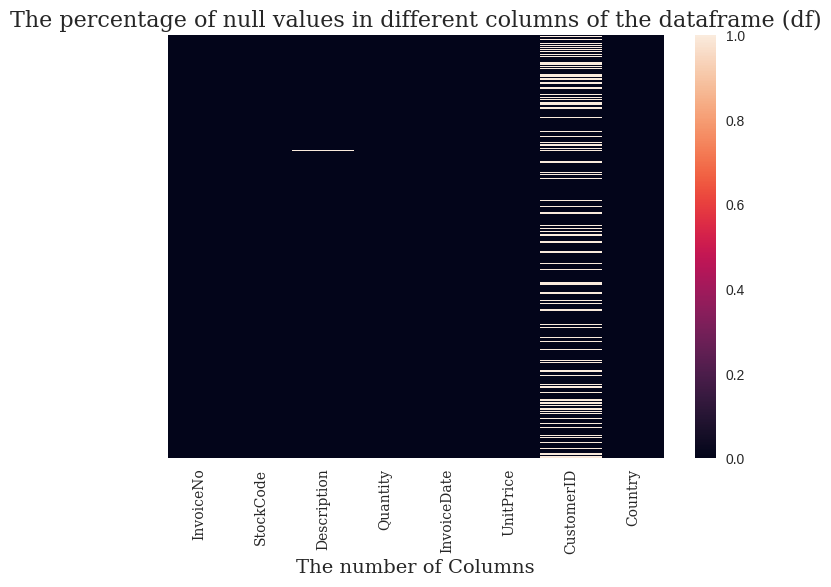

In [ ]:
# Graphical representation
sns.heatmap(df.isnull(), cbar = True, yticklabels = False)
plt.rcParams['figure.figsize'] = (18, 6)
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("The number of Columns", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.title('The percentage of null values in different columns of the dataframe (df)', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
df.shape

(541909, 8)

### What did you know about your dataset?

#### The dataset comprises 541,909 rows and 8 columns. Null values are present in the CustomerID and Description columns. Additionally, the dataset includes columns with various data types, such as Object, Integer, Float, and Datetime.

## **2. Understanding Your Variables**

In [ ]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# Describe the dataset
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303

### Variables Description:
#### **InvoiceNo:** Invoice number. This is a nominal value consisting of a 6-digit integral number that is uniquely assigned to each transaction. If the code begins with the letter 'c', it indicates a cancellation.

#### **StockCode:** Product (item) code. This is a nominal value consisting of a 5-digit integral number that is uniquely assigned to each distinct product.

#### **Description:** Product (item) name. This is a nominal value.

#### **Quantity**: The quantity of each product (item) per transaction. This is a numeric value.

#### **InvoiceDate**: Invoice Date and time. This is a numeric value representing the day and time when each transaction occurred.

#### **UnitPrice:** Unit price. This is a numeric value representing the price per unit of the product in sterling.

#### **CustomerID:** Customer number. This is a nominal value consisting of a 5-digit integral number that is uniquely assigned to each customer.

####**Country:** Country name. This is a nominal value representing the country where each customer resides.

### Check the unique values for each variable.

In [ ]:
# Checking for unique values for each variable
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. **Data Wrangling**

### Data Wrangling Code

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Since null values are present in the CustomerID column, and considering that each CustomerID is unique to different customers, we cannot input values arbitrarily as it would introduce noise to our dataset. Therefore, we will directly drop the null values from the CustomerID column.
#### The Description column also contains some null values. Since we don't know what products these null values represent, we will also drop the null values from this column.

In [ ]:
# Missing value count function
def show_missing():
  missing = df.columns[df.isnull().any()].tolist()
  return missing

# Count and percentage of missing data
print("Count of missing data")
print(df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Percentage of missing data')
print(round(df[show_missing()].isnull().sum().sort_values(ascending = False)/len(df)*100, 2))

Count of missing data
CustomerID     135080
Description      1454
dtype: int64
----------------------------------------------------------------------------------------------------
Percentage of missing data
CustomerID     24.93
Description     0.27
dtype: float64


In [ ]:
# Description can't be imputed by measures of tendency. Therefore, we'll drop rows with null values
df.dropna(inplace = True)
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
# Confirmation of null value
df.isnull().sum().sort_values(ascending = False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
# Converting the invoice number columns into strings
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

# Remove rows which are cancelled
df = df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
df.shape

(397924, 8)

#### Now, after removing null values, our dataset has 397924 rows and 8 columns.

In [ ]:
len(df.duplicated())

397924

In [ ]:
df.describe()

Quantity                    InvoiceDate      UnitPrice  \
count  397924.000000                         397924  397924.000000   
mean       13.021823  2011-07-10 23:43:36.912475648       3.116174   
min         1.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.420210                            NaN      22.096788   

          CustomerID  
count  397924.000000  
mean    15294.315171  
min     12346.000000  
25%     13969.000000  
50%     15159.000000  
75%     16795.000000  
max     18287.000000  
std      1713.169877

In [ ]:
df.Quantity.describe([0.75, 0.90, 0.95, 0.99])

count    397924.000000
mean         13.021823
std         180.420210
min           1.000000
50%           6.000000
75%          12.000000
90%          24.000000
95%          36.000000
99%         120.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
df.UnitPrice.describe([0.75, 0.90, 0.95, 0.99])

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
50%           1.950000
75%           3.750000
90%           6.350000
95%           8.500000
99%          14.950000
max        8142.750000
Name: UnitPrice, dtype: float64

### What manipulations have you done and what insights have you found?
#### Since null values are present in the CustomerID column, and we know that each CustomerID is unique to different customers, we cannot input values arbitrarily as it will add noise to our dataset. Therefore, we will drop the null values from the CustomerID column directly. Similarly, the Description column also contains some null values, and since we don't know what products these null values represent, we will also drop the null values from this column.
#### Additionally, I discovered duplicated observations in the dataset. When frequent duplicates exist, we may inadvertently send multiple clustering messages to the same customer. As a consequence, we dropped these duplicated observations.
#### Furthermore, I removed all invoice numbers that contain "C" as the prefix, indicating the cancellation of products. While we could conduct another analysis on cancellations, it is not the target of our project.

## **4. Exploratory Data Analysis, Data Visualization, Storytelling & Experimenting with charts: Understanding the relationships between variables.**

### Top products by quantity

In [ ]:
df_quant = df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).reset_index()[:5]
df_quant

Description  Quantity
0         PAPER CRAFT , LITTLE BIRDIE     80995
1      MEDIUM CERAMIC TOP STORAGE JAR     77916
2   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
3             JUMBO BAG RED RETROSPOT     46181
4  WHITE HANGING HEART T-LIGHT HOLDER     36725

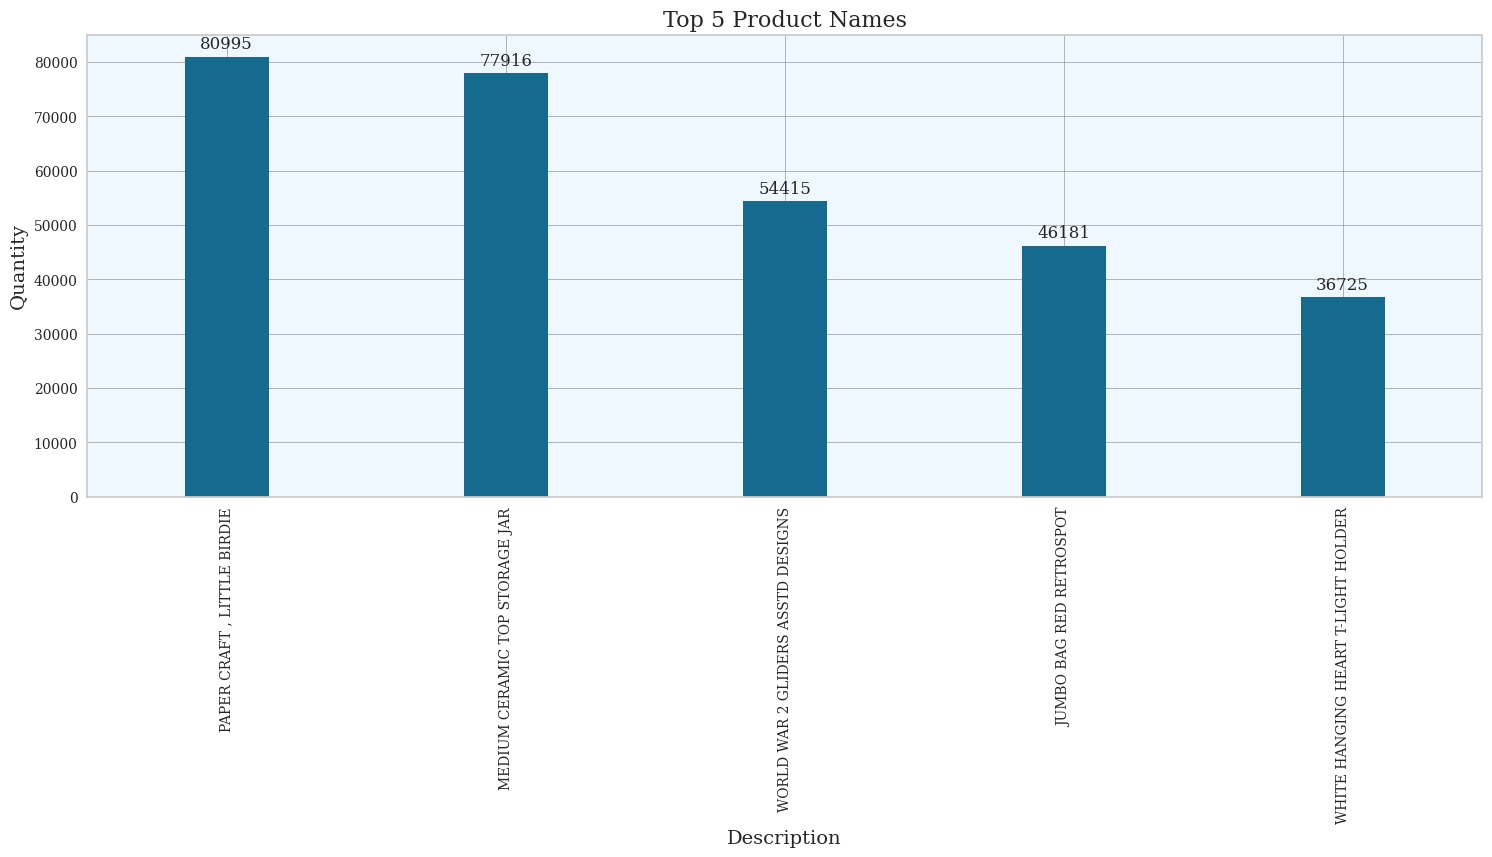

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.barplot(x = 'Description', y = 'Quantity', data = df_quant[:5], width = 0.3)
for g in ax.patches:
  ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                 xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Description", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('Quantity', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Top 5 Product Names', fontname = 'serif', fontsize = 16)
plt.show()

#### 1. Why did you choose this specific chart?
#### A bar plot (or bar chart) is one of the most common types of graphs. It illustrates the relationship between a numeric and a categorical variable, with each category represented by a bar.

#### 2. What insight(s) did you find from the chart?
#### Here, we can see the top 5 products in terms of the quantity they were purchased.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.
#### Yes, the gained insights help us create a positive business impact.

### Top products by popularity

In [ ]:
Description_df = df['Description'].value_counts().reset_index()
Description_df.head()

Description  count
0  WHITE HANGING HEART T-LIGHT HOLDER   2028
1            REGENCY CAKESTAND 3 TIER   1724
2             JUMBO BAG RED RETROSPOT   1618
3       ASSORTED COLOUR BIRD ORNAMENT   1408
4                       PARTY BUNTING   1397

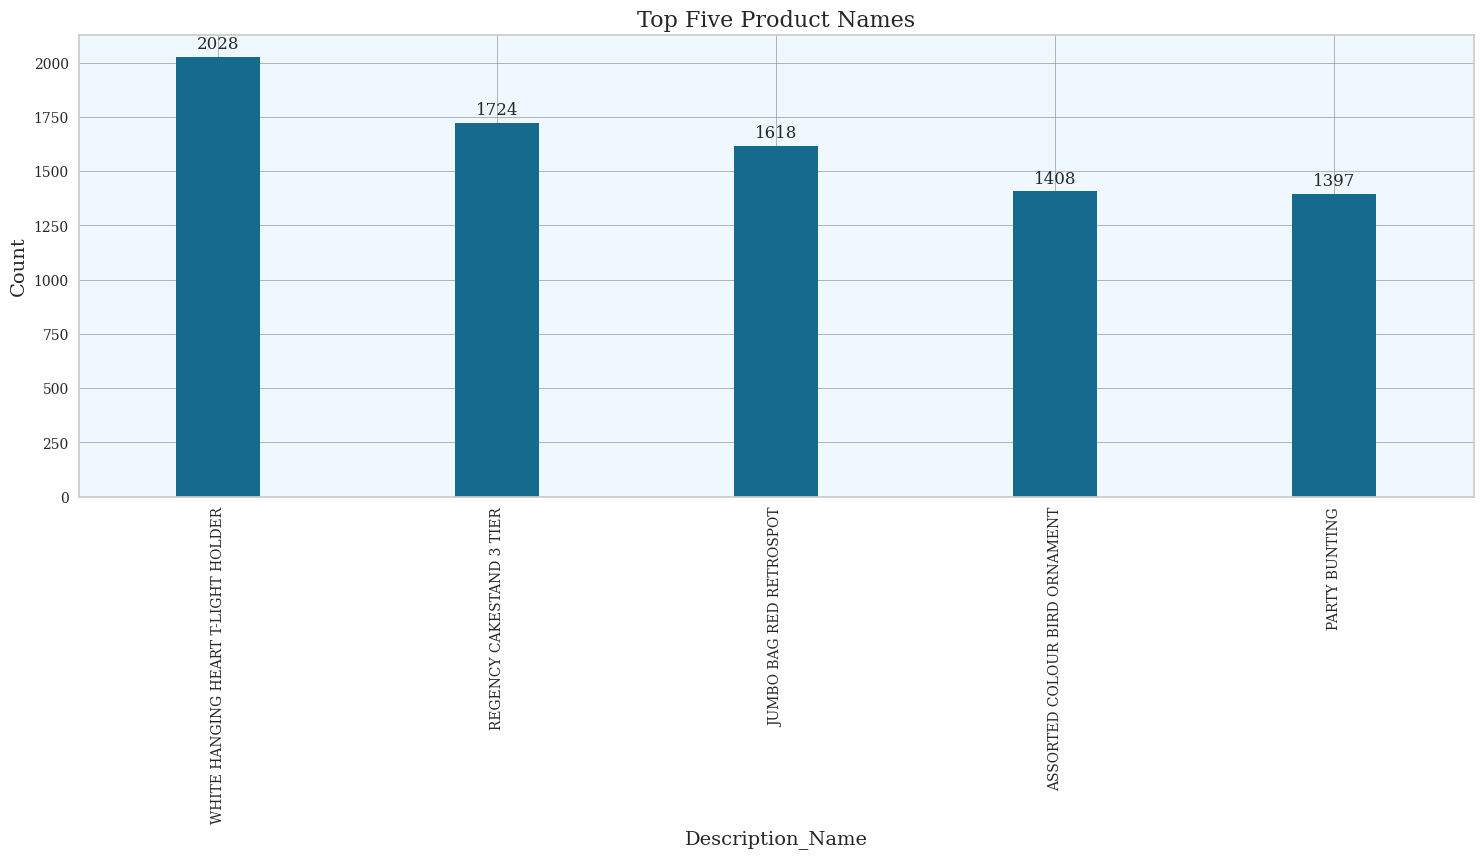

In [ ]:
# Plotting a bar plot
plt.figure(figsize = (18, 6))
ax = sns.barplot(x = 'Description', y = 'count', data = Description_df[:5], width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Description_Name", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Top Five Product Names', fontname = 'serif', fontsize = 16)
plt.show()

#### 1. What insight(s) did you find from the chart?
#### Here we can see the top 5 products with respect to their popularity.

#### 2. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.
#### Yes, the gained insight will help us create a positive business impact.

### Products Ranked by Popularity

In [ ]:
Description_df.tail()

Description  count
3872      RUBY GLASS CLUSTER EARRINGS      1
3873   PINK CHRYSANTHEMUMS ART FLOWER      1
3874  72 CAKE CASES VINTAGE CHRISTMAS      1
3875     WALL ART , THE MAGIC FOREST       1
3876      PAPER CRAFT , LITTLE BIRDIE      1

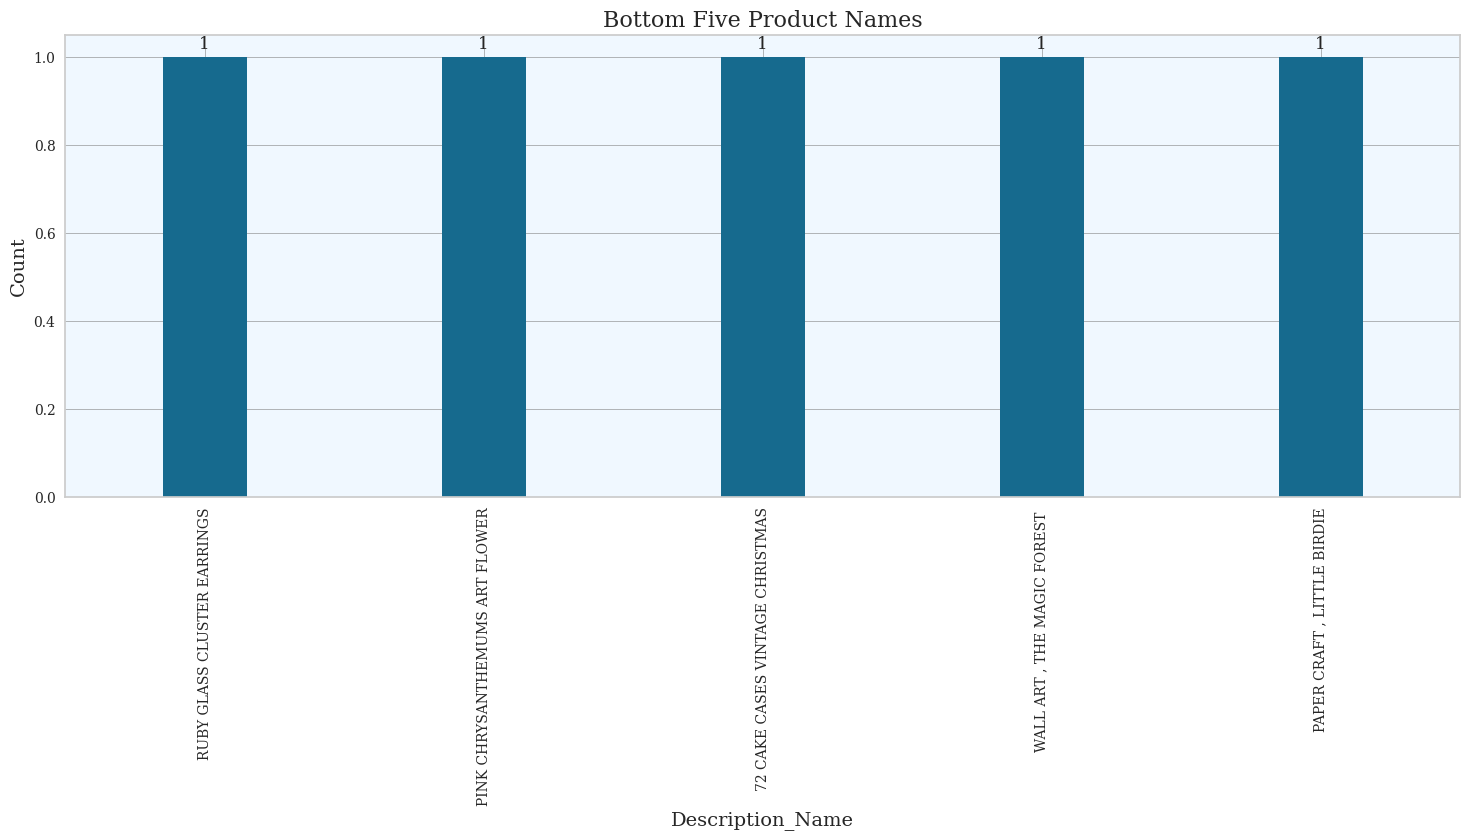

In [ ]:
# Plotting a bar plot
plt.figure(figsize = (18, 6))
ax = sns.barplot(x = 'Description', y = 'count', data = Description_df[-5:], width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Description_Name", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 90, fontname = 'serif')
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Bottom Five Product Names', fontname = 'serif', fontsize = 16)
plt.show()

#### 1. What insight(s) were found from the chart?
#### Here, we can see the bottom 5 products in terms of their popularity.

#### 2. Will the gained insights help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.
#### Yes, the gained insight will help us create a positive business impact as we can prioritize not selling these products.

## Stock Code

### Top 5 Stock Names

In [ ]:
# Creating a table of stock distribution
Stockcode_df = df['StockCode'].value_counts().reset_index()
Stockcode_df.head(10)

StockCode  count
0    85123A   2035
1     22423   1724
2    85099B   1618
3     84879   1408
4     47566   1397
5     20725   1317
6     22720   1159
7     20727   1105
8      POST   1099
9     23203   1098

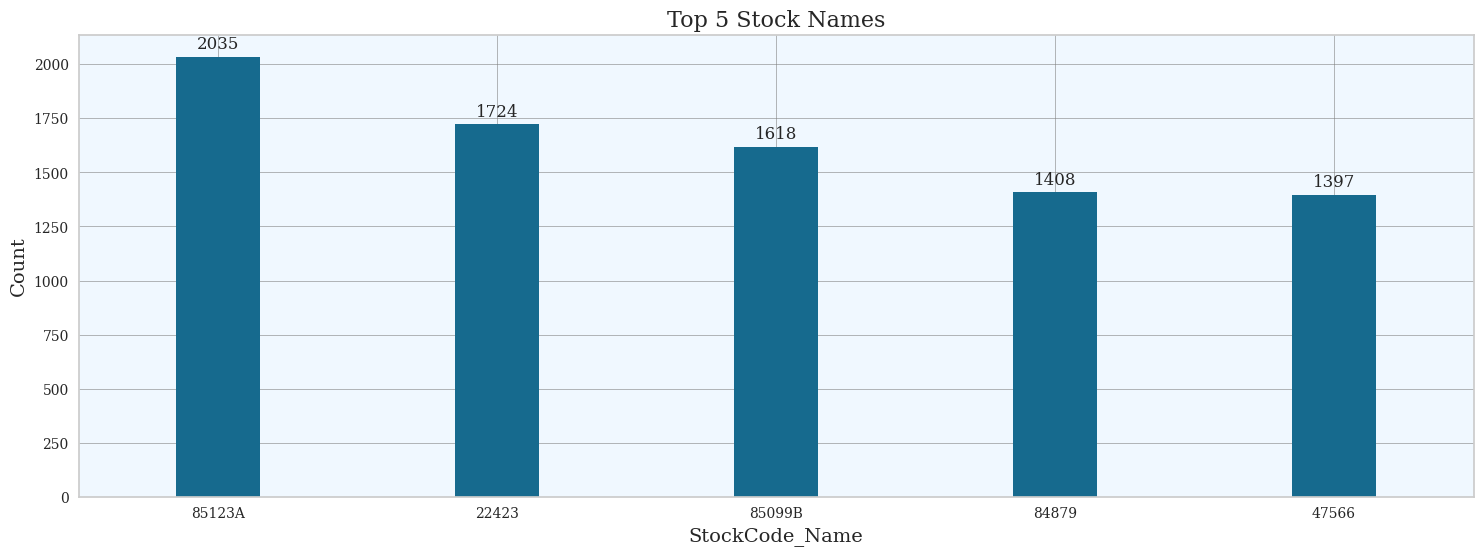

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.barplot(x = 'StockCode', y = 'count', data = Stockcode_df[:5], width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("StockCode_Name", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Top 5 Stock Names', fontname = 'serif', fontsize = 16)
plt.show()

## Bottom 5 stock names

In [ ]:
Stockcode_df.tail()

StockCode  count
3660     90168      1
3661     90169      1
3662    90202A      1
3663     90118      1
3664     23843      1

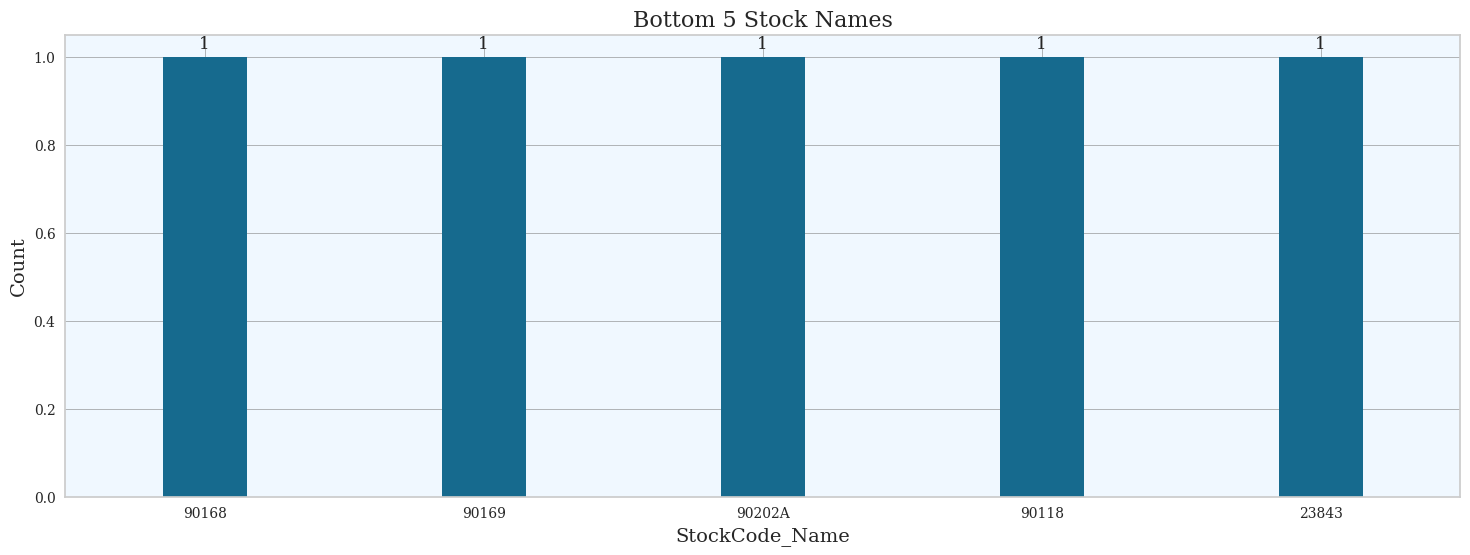

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.barplot(x = 'StockCode', y = 'count', data = Stockcode_df[-5:], width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("StockCode_Name", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Bottom 5 Stock Names', fontname = 'serif', fontsize = 16)
plt.show()

#### 1. Why did you choose this specific chart?
#### Bar charts display the frequency counts of values for the different levels of a categorical or nominal variable. Occasionally, bar charts may also depict other statistics, such as percentages.

#### 2. What insight(s) were found from the chart?
#### Here, we plotted based on stock code, and we found that stock code 85123A is the highest selling product, followed by 22423. These stock names correspond to the description, for example, 85123A corresponds to the description "White Hanging Heart T-Light Holder", and the same applies to all stock names.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.
#### This chart and table help us understand what the customers like and dislike. When examining the least stock code graph, the values are almost equal, reflecting a similar pattern to that of the description.



## Invoice Date

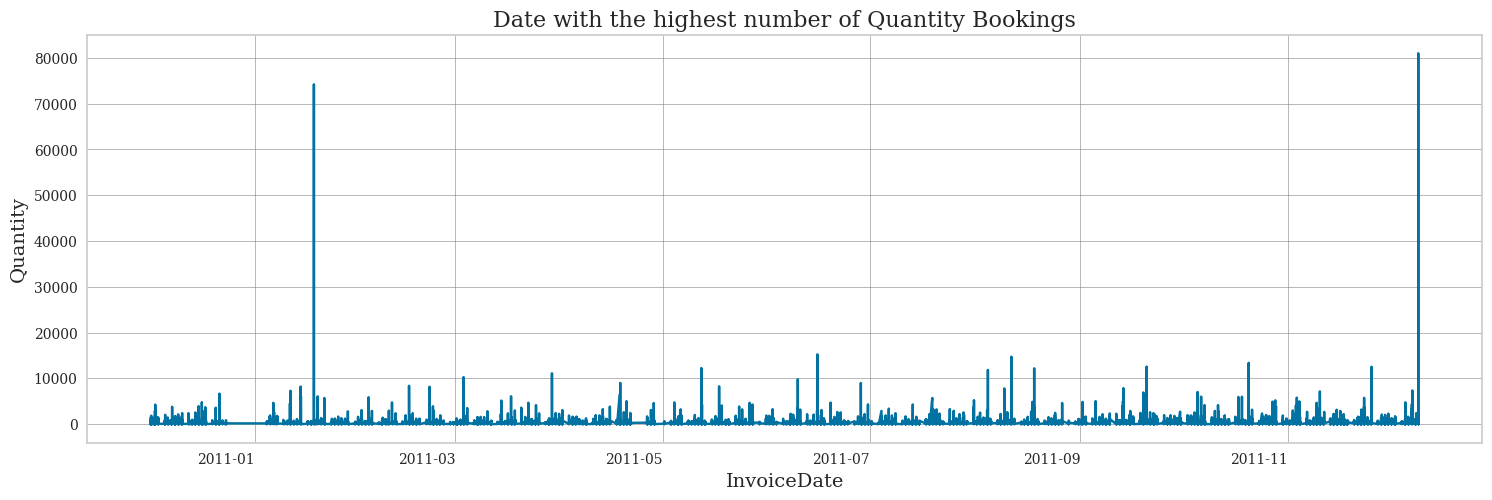

In [ ]:
df.groupby('InvoiceDate')['Quantity'].sum().plot.line(figsize = (18, 6))
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("InvoiceDate", fontname = 'serif', fontsize = 14)
plt.xticks(rotation = 0, fontname = 'serif')
plt.ylabel('Quantity', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Date with the highest number of Quantity Bookings', fontname = 'serif', fontsize = 16)
plt.show()

#### 1. Why did you choose this specific chart?

#### That is a simple line graph that uses lines to connect individual data points.

#### 2. What insight(s) were found from the chart?
#### Date with the highest number of quantity bookings. The highest number of quantity bookings is 8000, which occurred on 2/18/2011. The second-highest booking is approximately 7500, which was on 1/10/2011.

#### This line graph depicts the quantity of items booked for each invoice date. It reveals a clear trend of increasing quantities from November to December.



#### 3. Will the gained insights help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.

#### We can observe a clear trend of increasing quantities from November to December.

## Country Description

In [ ]:
# Creating the table of country contribution with its distribution
country_df = df['Country'].value_counts().reset_index()
country_df.head()

Country   count
0  United Kingdom  354345
1         Germany    9042
2          France    8342
3            EIRE    7238
4           Spain    2485

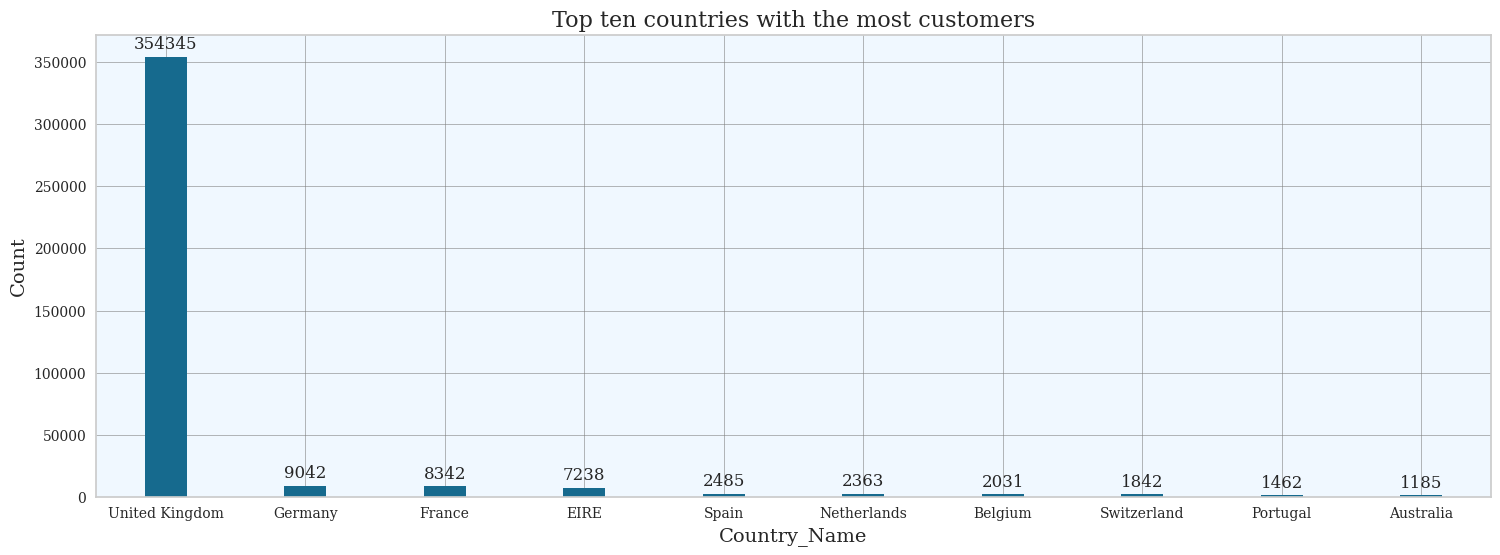

In [ ]:
# Plotting top five countries
plt.figure(figsize = (18, 6))
ax = sns.barplot(x = 'Country', y = 'count', data = country_df[:10], width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Country_Name", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Top ten countries with the most customers', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
country_df.tail()

Country  count
32       Lithuania     35
33          Brazil     32
34  Czech Republic     25
35         Bahrain     17
36    Saudi Arabia      9

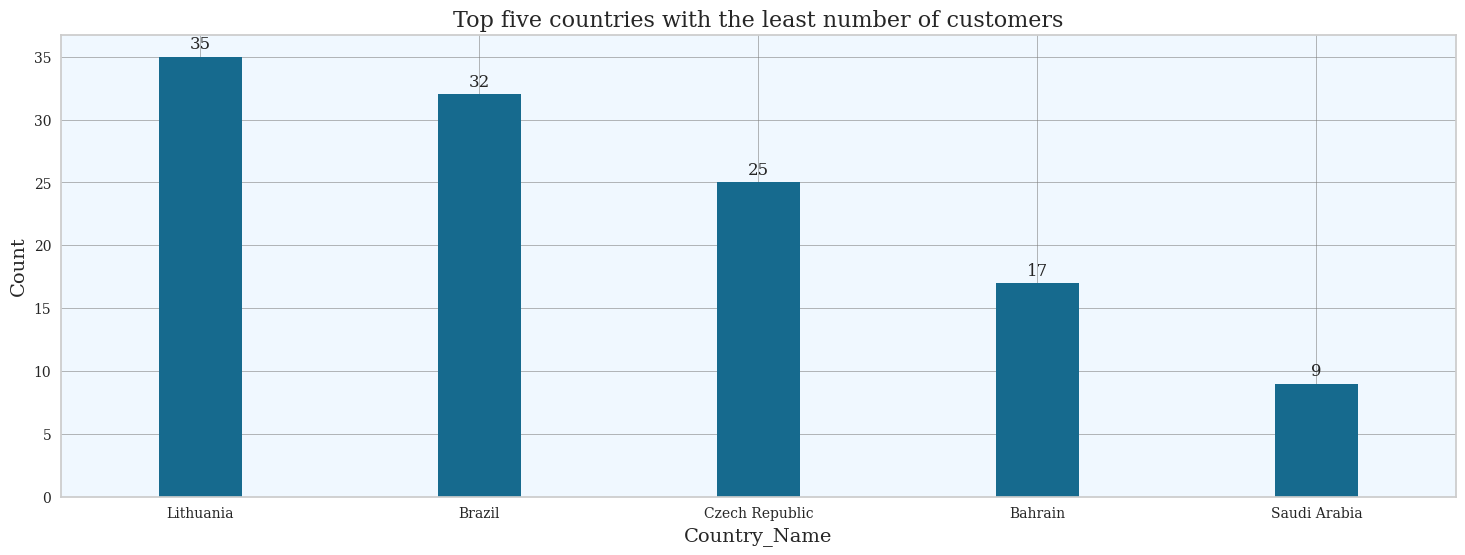

In [ ]:
# Plotting the countries with the least number of customers
plt.figure(figsize = (18, 6))
ax = sns.barplot(x = 'Country', y = 'count', data = country_df[-5:], width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Country_Name", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Top five countries with the least number of customers', fontname = 'serif', fontsize = 16)
plt.show()

#### 1. Why did you choose this specific chart?
#### Bar charts display the frequency counts of values for different levels of a categorical or nominal variable. Sometimes, bar charts also show other statistics, such as percentages. I used a bar plot to illustrate the number of purchases made in each country.

#### 2. What insight(s) were found from the chart?
#### The UK has the highest count, which is quite usual as the online retail is UK-based. Additionally, the top count of orders are from nearby European countries, which is also practical. Similarly, the bottom countries with the least count are those that are far from the UK.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.
#### Yes, this analysis will help us segment our customers based on their countries and prioritize them accordingly.

## Distribution Plot

### Quantity

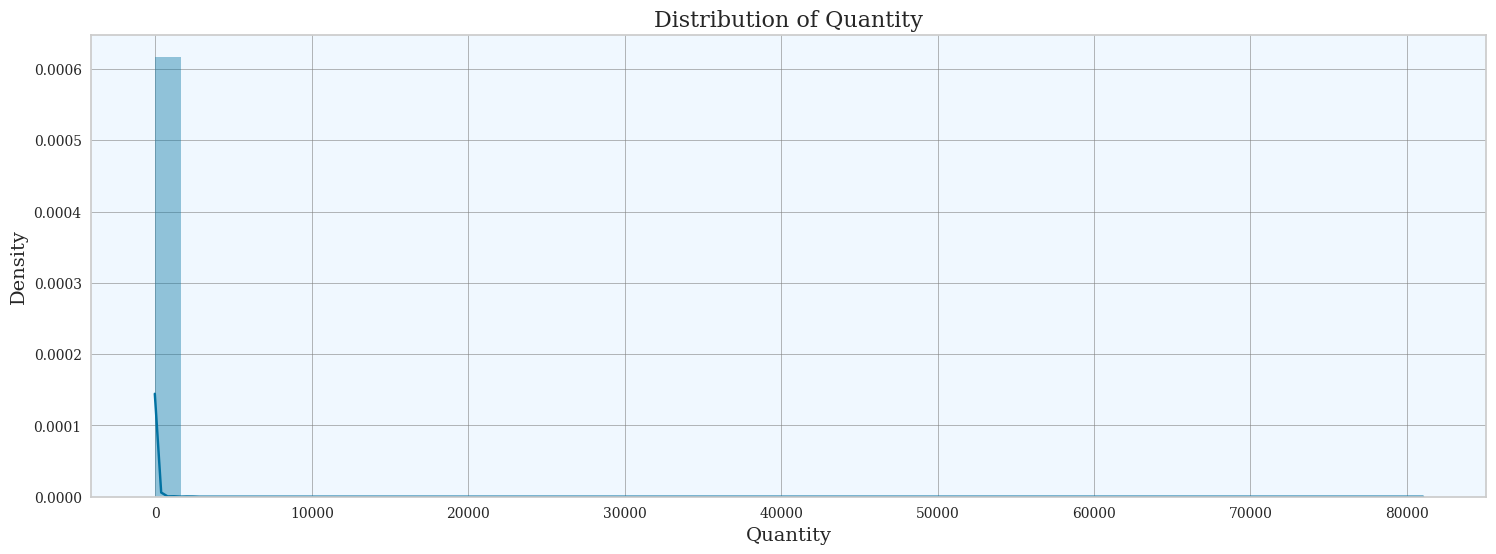

In [ ]:
# Quantity distribution
plt.figure(figsize = (18, 6))
ax = sns.distplot(df['Quantity'], color = "b")
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Quantity", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Density', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Distribution of Quantity', fontname = 'serif', fontsize = 16)
plt.show()

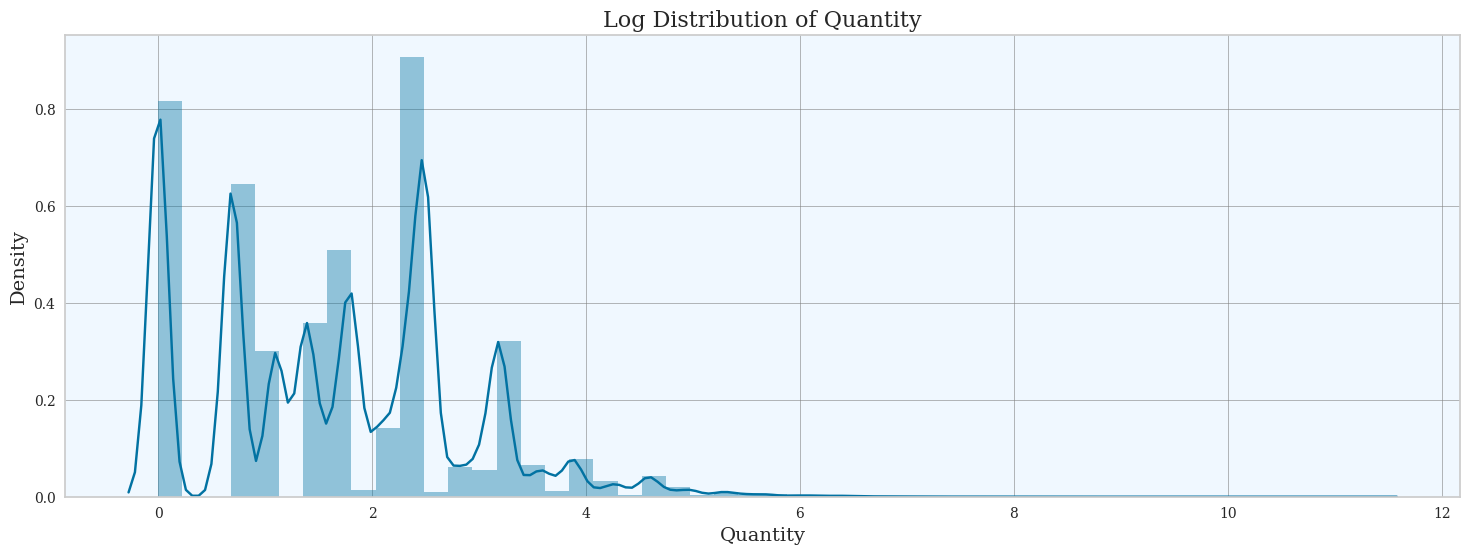

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.distplot(np.log(df['Quantity']), color = "b")
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Quantity", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Density', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Log Distribution of Quantity', fontname = 'serif', fontsize = 16)
plt.show()

## Unit Price

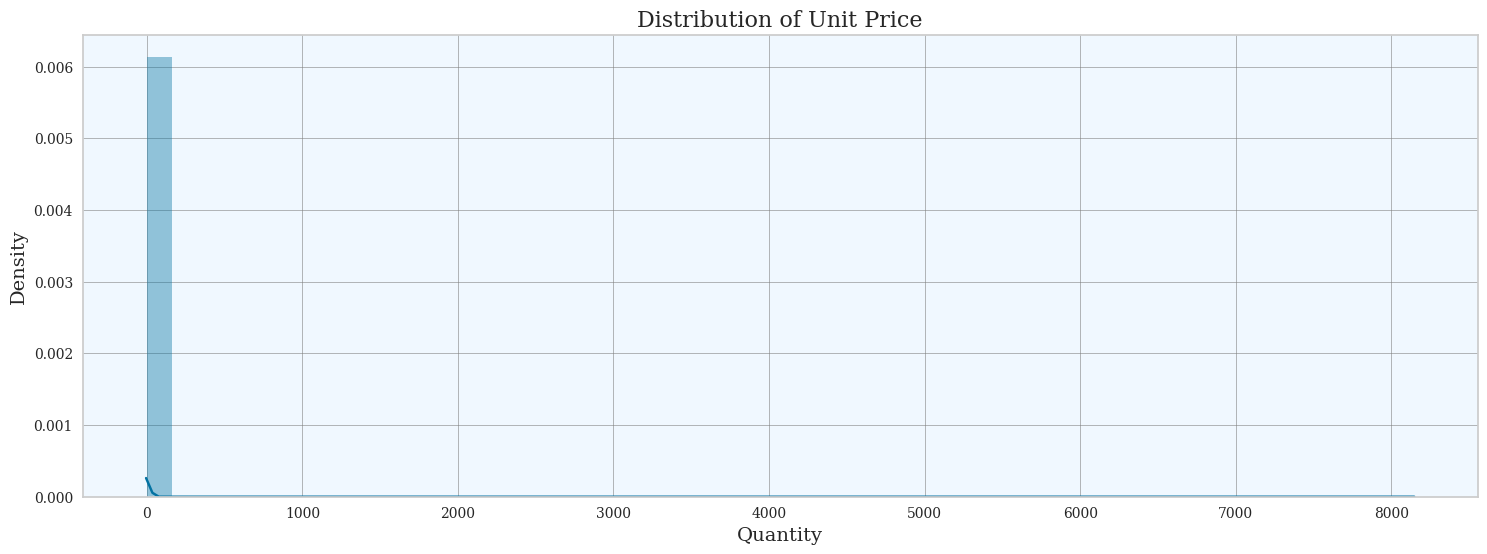

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.distplot(df['UnitPrice'], color = "b")
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Quantity", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Density', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Distribution of Unit Price', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
df[df['UnitPrice'] < 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [ ]:
df = df[df['UnitPrice'] > 0]
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

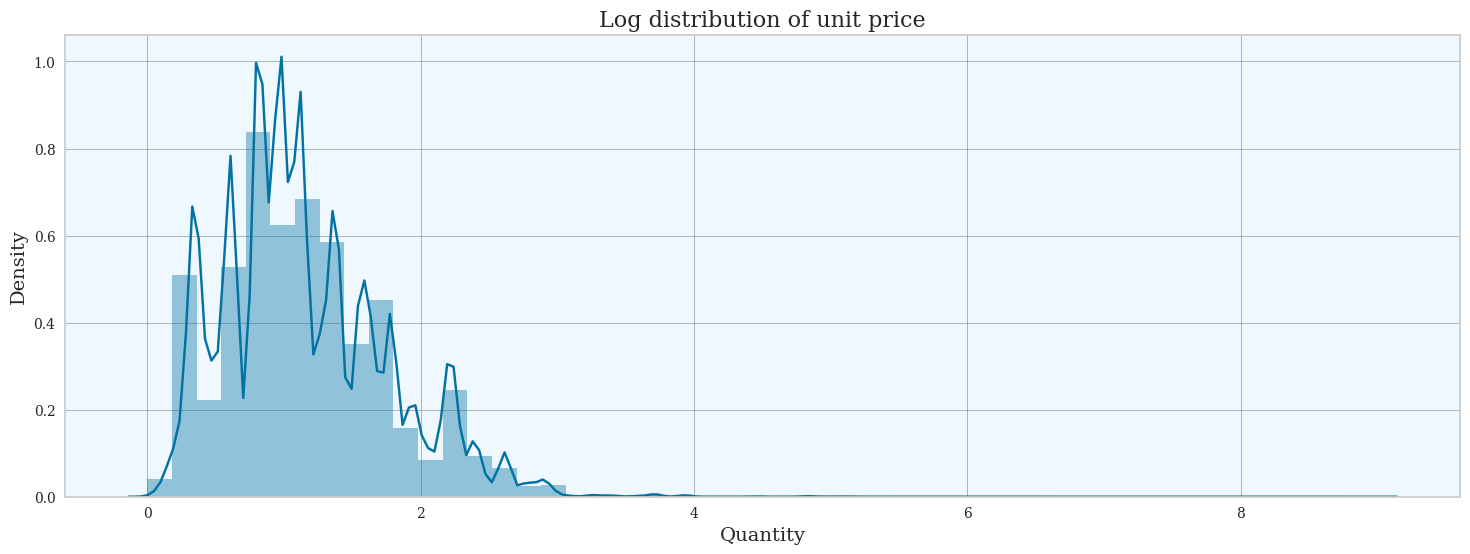

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.distplot(np.log1p(df['UnitPrice']), color = "b")
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Quantity", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Density', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Log distribution of unit price', fontname = 'serif', fontsize = 16)
plt.show()

##### 1. Why did you choose this specific chart?
#### It is basically used for a univariate set of observations and visualizes it through a histogram, representing only one observation. Therefore, we choose a particular column of the dataset.

#### 2. What insight(s) were found from the chart?
#### From both the quantity and unit price distribution plots, what I can see is that the quantity of the majority of products is not very high, and the unit price is also not very high for the entire dataset. This suggests that customers are buying products in smaller quantities, and the prices of the products are also not very high.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.
#### Yes, the gained insights will help us achieve positive business growth as we can adjust our targets accordingly.

### **Extracting Features from DateTime**

In [ ]:
from datetime import datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

## Hourly Sales

In [ ]:
hour_df = df['Hour'].value_counts().reset_index()
hour_df

Hour  count
0     12  72065
1     13  64026
2     14  54118
3     11  49084
4     15  45369
5     10  37997
6     16  24089
7      9  21944
8     17  13071
9      8   8690
10    19   3321
11    18   2928
12    20    802
13     7    379
14     6      1

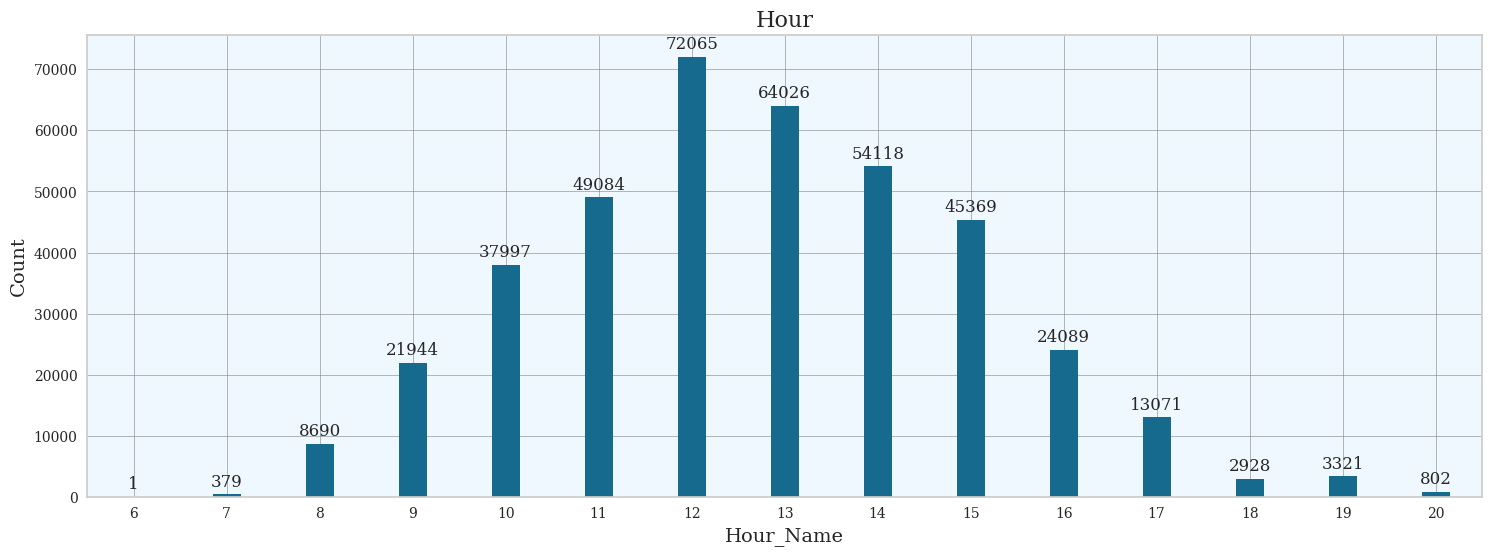

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.barplot(x = 'Hour', y = 'count', data = hour_df, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Hour_Name", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Hour', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
# This function segments the time from 6-11 as morning, 12-17 as afternoon, and otherwise evening
def time_type(time):
  if(time == 6 or time == 7 or time == 8 or time == 9 or time == 10 or time == 11):
    return 'Morning'
  elif(time == 12 or time == 13 or time == 14 or time == 15 or time == 16 or time == 17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
df['Time_type'] = df['Hour'].apply(time_type)

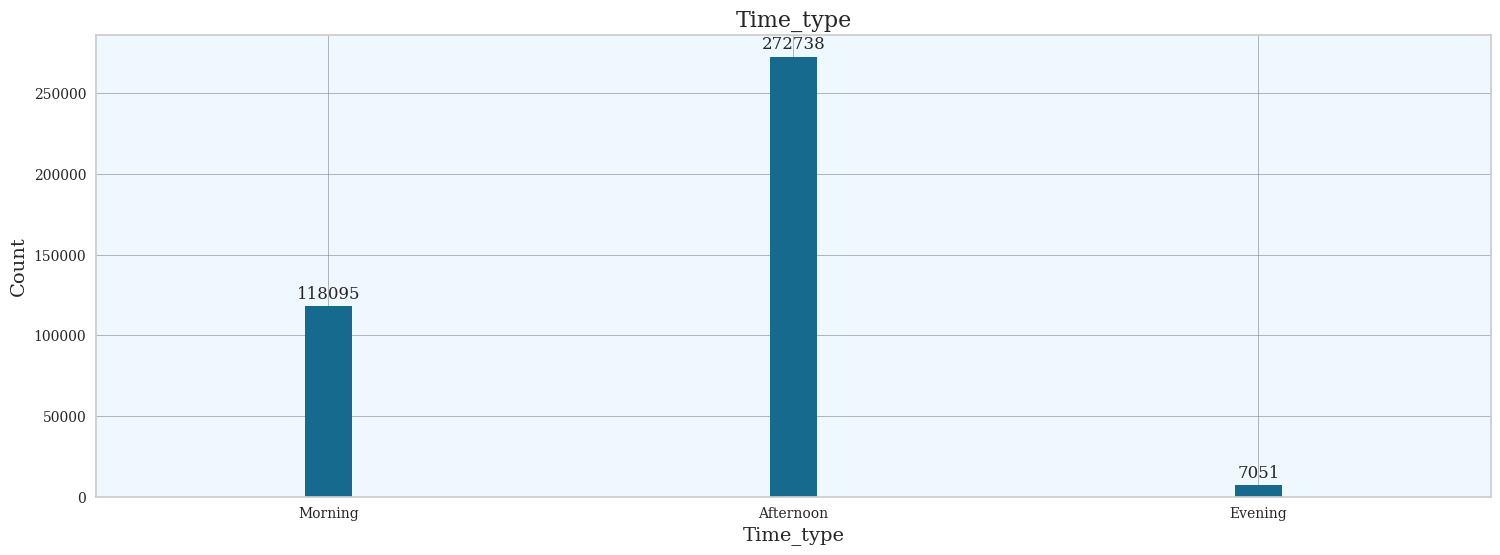

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.countplot(x = 'Time_type', data = df, width = 0.1)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Time_type", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Time_type', fontname = 'serif', fontsize = 16)
plt.show()

#### 1. Why did you choose this specific chart?
#### A countplot basically counts the categories and returns a count of their occurrences. Since we had different counts for different hours, we used a count plot.

#### 2. What insight(s) were found from the chart?
#### From the Hour_Name vs Count graph, we can see that most customers made purchases in the afternoon. Additionally, from the Time_type vs Count graph, we can observe that the majority of customers made purchases in the afternoon, followed by a moderate number of customers in the morning, and the least number of customers in the evening.


#### 3. Will the gained insights help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.
#### Yes, the gained insight will help our business by allowing us to offer good deals when our customers are online on our website or app.

## Daily Sales

In [ ]:
df['Day'] = df['InvoiceDate'].dt.day_name()

In [ ]:
day_df = df['Day'].value_counts().reset_index()
day_df

Day  count
0   Thursday  80035
1  Wednesday  68885
2    Tuesday  66473
3     Monday  64893
4     Sunday  62773
5     Friday  54825

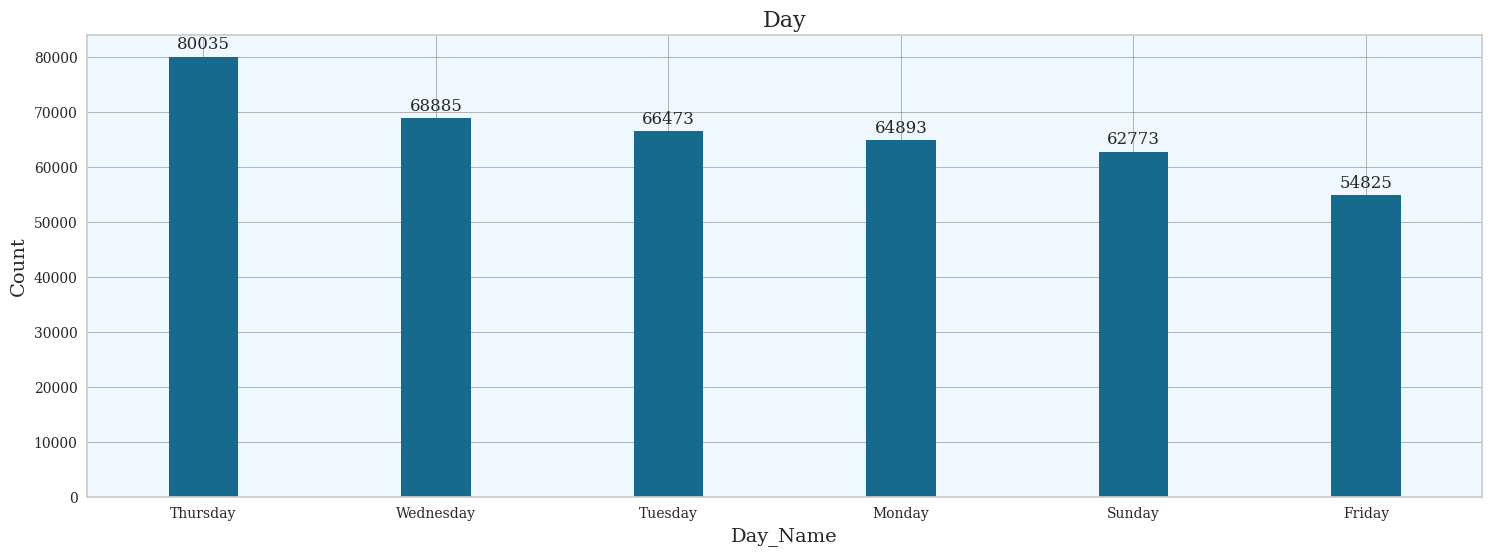

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.barplot(x = 'Day', y = 'count', data = day_df, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Day_Name", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Day', fontname = 'serif', fontsize = 16)
plt.show()

#### 1. What insight(s) were found from the chart?
#### The maximum number of sales occurs on Thursday, followed by Wednesday and Tuesday.


#### 2. Will the gained insights help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.
#### Yes, the gained insights help us create a positive business impact.

## Monthly Sales

In [ ]:
df['Month'] = df['InvoiceDate'].dt.month_name()

In [ ]:
month_df = df['Month'].value_counts().reset_index()
month_df

Month  count
0    November  64531
1     October  49554
2    December  43461
3   September  40028
4         May  28320
5        June  27185
6       March  27175
7      August  27007
8        July  26825
9       April  22642
10    January  21229
11   February  19927

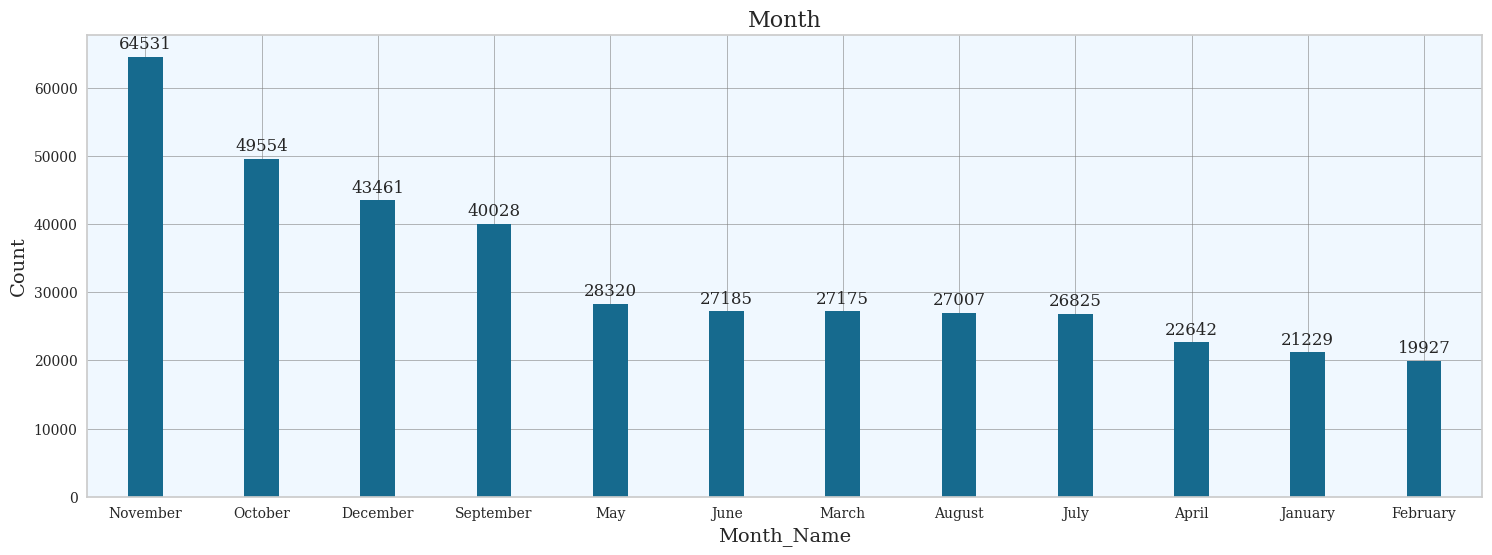

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.barplot(x = 'Month', y = 'count', data = month_df, width = 0.3)
for g in ax.patches:
    ax.annotate(format(g.get_height(), '0.0f'), (g.get_x() + g.get_width()/2, g.get_height()), ha = 'center', va = 'center',
                xytext = (0, 9), textcoords = 'offset points', fontname = 'serif')
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Month_Name", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Month', fontname = 'serif', fontsize = 16)
plt.show()

#### 2. What insight(s) were found from the chart?
#### From the chart, we can see that the maximum number of sales occurs in the months of November, October, December, and September.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.
#### Yes, the gained insights help create a positive business impact.

In [ ]:
from datetime import datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [ ]:
df['TotalAmount'] = df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Month  Day  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     12    1   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     12    1   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   

   Hour Time_type  TotalAmount  
0     8   Morning        15.30  
1     8   Morning        20.34  
2     8   Morning        22.00  
3     8   Morning        20.34  
4     8   Morning        20.34

#### Chart 14 - Correlation Heatmap

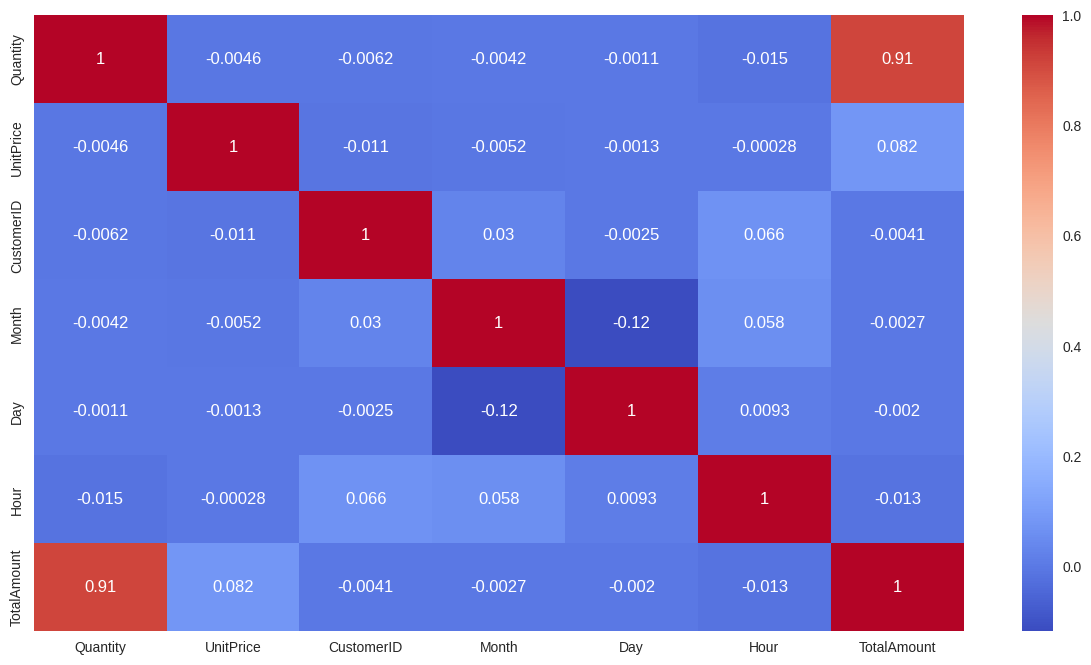

In [ ]:
# Select only numeric columns for correlation heatmap
numeric_df = df.select_dtypes(include = 'number')

# Correlation Heatmap visualization code
plt.figure(figsize = (15, 8))
sns.heatmap(numeric_df.corr(), annot = True, cmap = "coolwarm")
plt.show()


#### 1. Why did you choose this specific chart?
#### Correlation heatmaps are a type of plot that visualizes the strength of relationships between numerical variables. These plots are used to understand which variables are related to each other and the strength of these relationships.

#### 2. What insight(s) were found from the chart?
#### In this dataset, there isn't much multicollinearity.

#### **RFM Model Analysis:**

#### RFM is a method used to analyze customer value. RFM stands for Recency, Frequency, and Monetary.

#### Recency: How recently did the customer visit our website or make a purchase.

#### Frequency: How often do they visit or make purchases.

#### Monetary: How much revenue do we get from their visit or how much do they spend when they make a purchase.



# **Why conduct RFM Analysis?**
#### **RFM Analysis is a marketing framework used to understand and analyze customer behavior based on the three factors: Recency, Frequency, and Monetary value.**

#### **This analysis helps businesses segment their customer base into different homogeneous groups, enabling them to engage with each group using targeted marketing strategies.**

## **Finding RFM Scores**

In [ ]:
# Recency = Latest Date - Last Invoice Date, Frequency = Count of Invoice Numbers, Monetary = Sum of Total
import datetime as dt

# Set the latest date as 2011-12-10 since the last invoice date was 2011-12-09. This is to calculate the number of days since the most recent purchase
Latest_Date = dt.datetime(2011, 12, 10)

# Create RFM modeling scores for each customer
RFMscores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Convert invoice date to type int
RFMscores['InvoiceDate'] = RFMscores['InvoiceDate'].astype(int)

# Rename column names to Recency, Frequency, and Monetary
RFMscores.rename(columns = {'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalAmount': 'Monetary'}, inplace = True)

RFMscores.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

## Distribution Plots for Recency, Frequency, and Monetary

In [ ]:
# Descriptive statistics for Recency
RFMscores.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

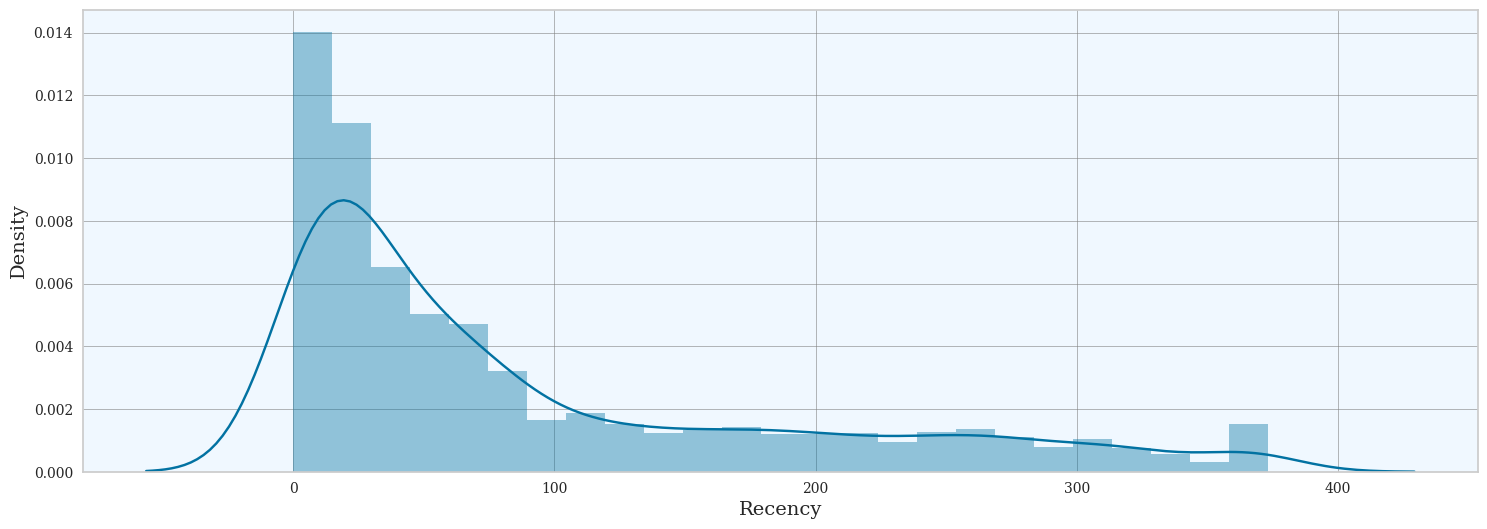

In [ ]:
# Recency distribution plot
plt.figure(figsize = (18, 6))
ax = sns.distplot(RFMscores.Recency)
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Recency", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Density', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.show()

In [ ]:
RFMscores.Frequency.describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

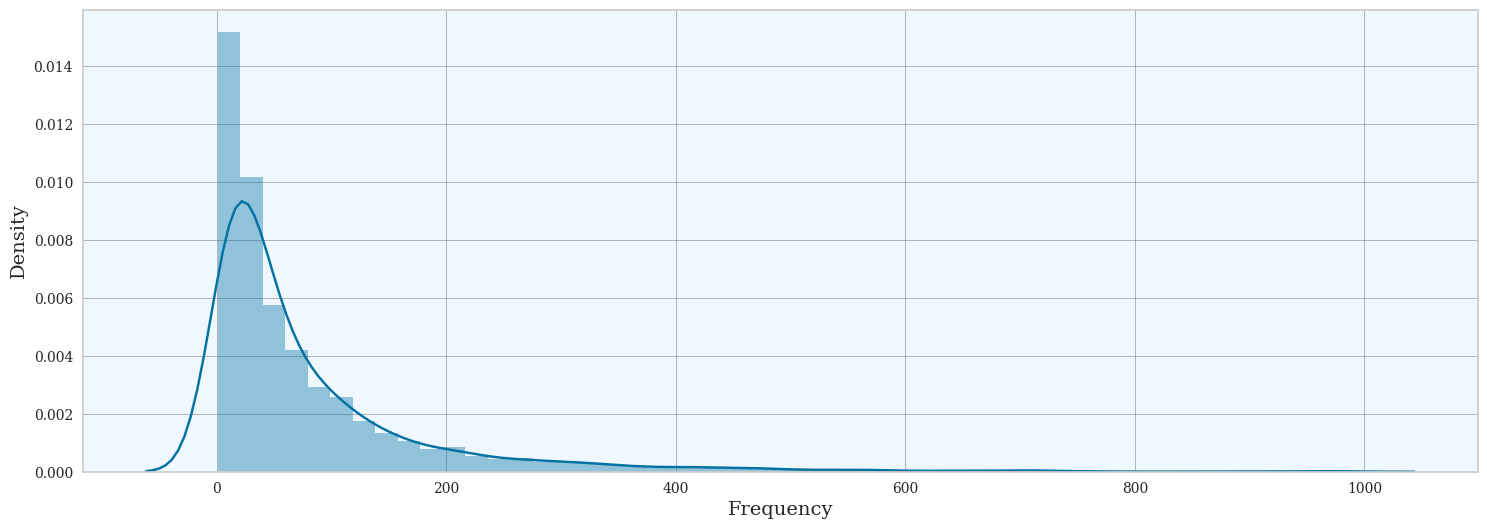

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.distplot(RFMscores.query('Frequency < 1000')['Frequency'])
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Frequency", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Density', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.show()

In [ ]:
RFMscores.Monetary.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

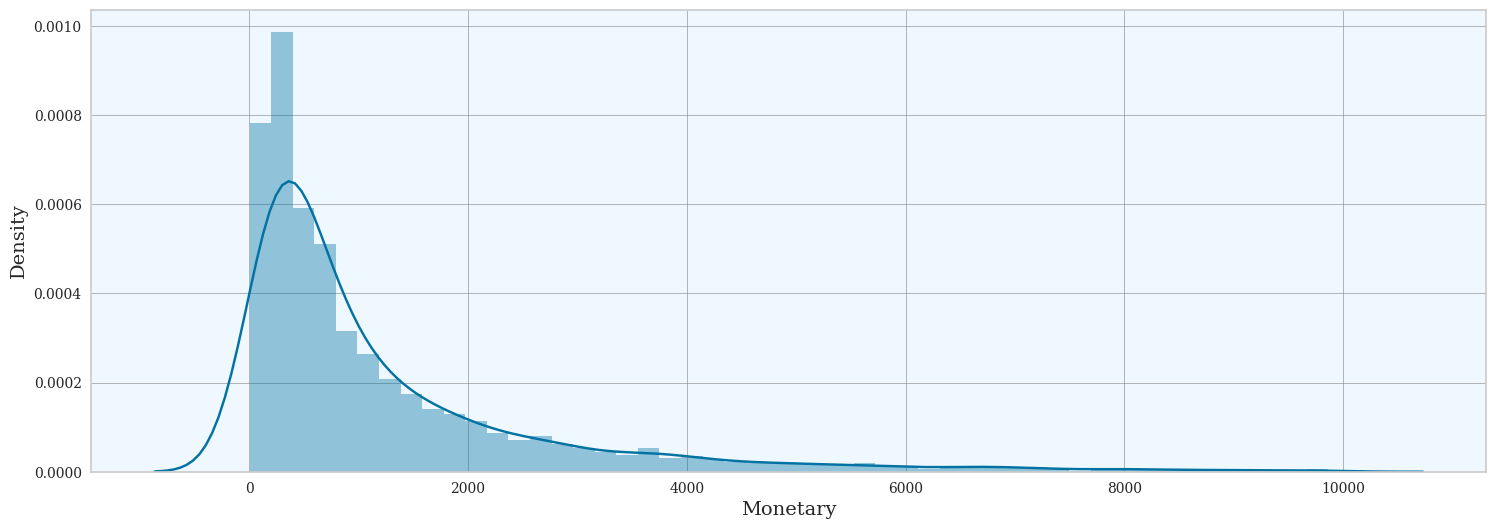

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.distplot(RFMscores.query('Monetary < 10000')['Monetary'])
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Monetary", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Density', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.show()

#### 1. Why did you choose these specific charts?
#### It is used for a univariate set of observations and visualizes it through a histogram, representing only one observation. Therefore, I chose one particular column of the dataset, which is why I used a distplot here.

#### 2. What insight(s) were found from the charts?
#### We can visualize that our Recency, Frequency, and Monetary columns are positively skewed, which is quite practical as the business is driven by a certain set of people. This is why we can observe a certain decline in each of the distribution plots.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that could lead to negative growth? Justify with specific reasons.
#### From these distribution plots, we can observe different customer interactions and how a certain set of people contribute to our business.

In [ ]:
# Split the data into four segments using quantiles
qtl = RFMscores.quantile(q = [0.25, 0.5, 0.75])
qtl = qtl.to_dict()
qtl

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [ ]:
qtl['Recency'][0.25]

17.0

In [ ]:
# Converting quantiles to a dictionary for easier use
# quantiles = quantiles.to_dict()
# Functions to create Recency, Frequency, and Monetary segments
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# Lower recency is beneficial for the company
def RS(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles_dict)
# A higher value of frequency and monetary indicates a good consumer. Here, a higher value is represented as 1 in reverse
def FS(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
# Add R, F, and M segment value columns to the existing dataset to display R, F, and M segment values
RFMscores['R'] = RFMscores['Recency'].apply(RS, args = ('Recency', qtl,))
RFMscores['F'] = RFMscores['Frequency'].apply(FS, args = ('Frequency', qtl,))
RFMscores['M'] = RFMscores['Monetary'].apply(FS, args = ('Monetary', qtl,))
RFMscores.head(10)

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3
12352.0          36         85   2506.04  2  2  1
12353.0         204          4     89.00  4  4  4
12354.0         232         58   1079.40  4  2  2
12355.0         214         13    459.40  4  4  3
12356.0          22         59   2811.43  2  2  1

#### Interpretation of the segment in which the customer lies:
#### A score of 111 would be the highest achievable score, and a score of 444 the worst.

#### **Best customers** :
#### **RFM Score**: 111

#### These are the cream customers who have bought the most recently, the most often, and generated the most revenue.

#### **Big Spenders** :
#### **RFM Score**: XX1

#### These are the customers who have generated the most revenue for your store as the monetary score equals 1, which is the maximum score for monetary.

#### **Loyal customers** :
#### **RFM Score**: X1X

#### They are the customers who visit the store most frequently to shop as their frequency score equals 1, which accounts for the best rating.

In [ ]:
# Calculate and add an RFM Group value column showing the combined concatenated score of RFM
RFMscores['RFMGroup'] = RFMscores.R.map(str) + RFMscores.F.map(str) + RFMscores.M.map(str)

# Calculate and add an RFM Score value column showing the total sum of RFMGroup values
RFMscores['RFMScore'] = RFMscores[['R', 'F', 'M']].sum(axis = 1)
RFMscores.head()

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore
CustomerID                                                          
12346.0         325          1  77183.60  4  4  1      441         9
12347.0           2        182   4310.00  1  1  1      111         3
12348.0          75         31   1797.24  3  3  1      331         7
12349.0          18         73   1757.55  2  2  1      221         5
12350.0         310         17    334.40  4  4  3      443        11

### Interpretation:

#### RFMScore: It is the sum of R, F, and M values that are assigned by quantiles.

#### RFMGroup: This is the combination of R, F, and M values.

#### For example:

#### A customer ordered a product 300 days ago, arrived on the online retail platform just once, and bought a $10 product. According to the RFM table, he got R = 4 (Recency is very low), F = 4 (Frequency is very low because he arrived just once), and M = 4 (Monetary value is very low). So, the RFMGroup value becomes 444, meaning he is the worst customer, and we don't need to spend more time on him.

#### The best customers are those who score R = 1, F = 1 or 2, and M = 1 or 2, which means in combination it will give RFMGroup 111, 112, 121 values. These are good indications.

In [ ]:
RFMscores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFMGroup   4338 non-null   object 
 7   RFMScore   4338 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.0+ KB


In [ ]:
RFMscores.describe()

Recency    Frequency       Monetary            R           F  \
count  4338.000000  4338.000000    4338.000000  4338.000000  4338.00000   
mean     92.059474    91.720609    2054.266460     2.494237     2.50876   
std     100.012264   228.785094    8989.230441     1.122059     1.12204   
min       0.000000     1.000000       3.750000     1.000000     1.00000   
25%      17.000000    17.000000     307.415000     1.000000     2.00000   
50%      50.000000    41.000000     674.485000     2.000000     3.00000   
75%     141.750000   100.000000    1661.740000     3.750000     4.00000   
max     373.000000  7847.000000  280206.020000     4.000000     4.00000   

                 M     RFMScore  
count  4338.000000  4338.000000  
mean      2.500000     7.502997  
std       1.118369     2.815045  
min       1.000000     3.000000  
25%       1.250000     5.000000  
50%       2.500000     8.000000  
75%       3.750000    10.000000  
max       4.000000    12.000000

In [ ]:
RFMscores['RFMScore'].describe()

count    4338.000000
mean        7.502997
std         2.815045
min         3.000000
25%         5.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: RFMScore, dtype: float64

In [ ]:
RFMscores[RFMscores['RFMScore'] <= 5].shape

(1263, 8)

In [ ]:
RFMscores['RFMScore'].value_counts()

RFMScore
10    517
9     464
7     459
8     452
3     440
5     428
6     413
4     395
11    385
12    385
Name: count, dtype: int64

#### **From our RFM score alone, we can segment our customers from best to worst:**
#### Customers having RFM scores between 3-5 are the best customers.
#### Customers having RFM scores between 5-8 are good customers.
#### Customers having RFM scores between 8-10 are fair customers.
#### Customers having RFM scores between 10-12 are customers who are inactive or not good for business.

# Hypothesis Testing

In [ ]:
class findz:
  def proportion(self, sample, hyp, size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self, hyp, sample, size, std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self, hyp, sample, size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0, 1).cdf(x)

# Creating a function to calculate the p-value
def p_value(z, tailed, t, hypothesis_number, df, col):
  if t != "true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z > 0.5:
        return 2*(1 - z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z, p_value = stats.ttest_1samp(df[col], hypothesis_number)
    return p_value

# Conclusion regarding the p-value
def conclusion(p):
  significance_level = 0.05
  if p > significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

In [ ]:
from numpy import math
from scipy.stats import *
import math

### Hypothetical Statement - 1

#### 1. State your research hypothesis as a Null Hypothesis and Alternate Hypothesis.
#### The customerID 17850 has spent over a total amount of 200 dollars.
#### Null Hypothesis: N = 200
#### Alternate Hypothesis: N ≠ 200


#### 2. Performing an appropriate statistical test

In [ ]:
# Performing a statistical test to obtain the p-value
hypo_1 = df[(df["CustomerID"] == 17850.0)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 200
sample_mean = hypo_1["TotalAmount"].mean()
size = len(hypo_1)
std = (variance(hypo_1["TotalAmount"]))**0.5

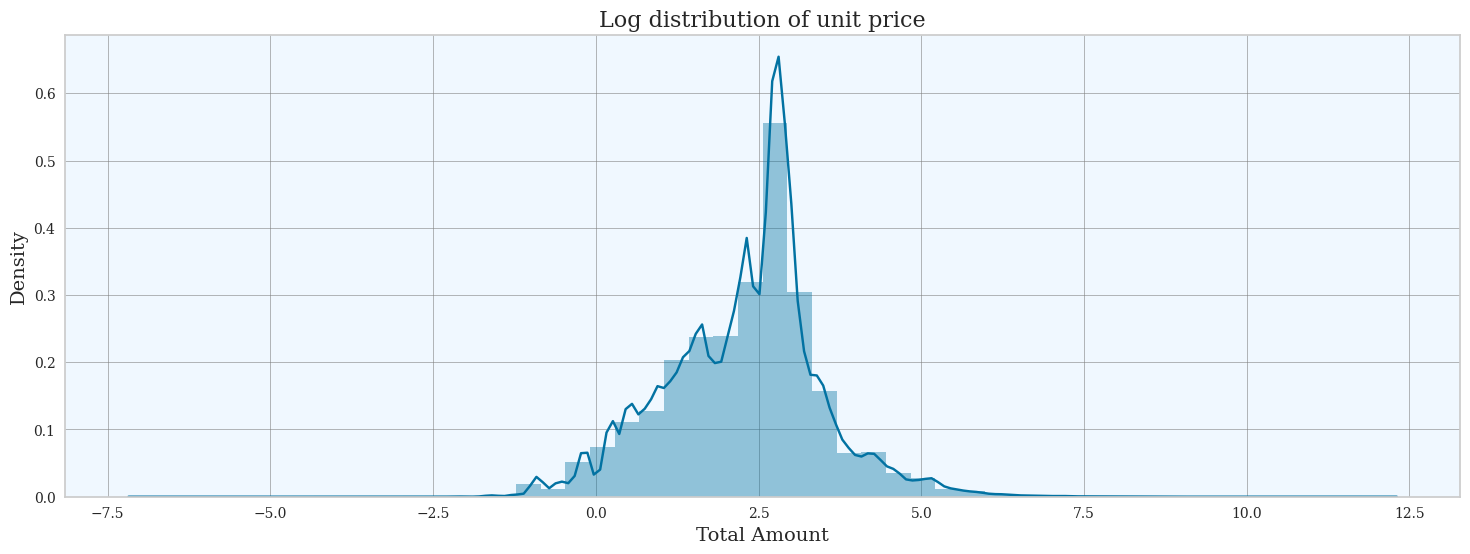

In [ ]:
plt.figure(figsize = (18, 6))
ax = sns.distplot(np.log(df['TotalAmount']), color = "b")
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Total Amount", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Density', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Log distribution of unit price', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
# Calculating the Z value
z = findz.mean(hypothesis_number, sample_mean, size, std)

# Calculating the p-value
p = p_value(z = z, tailed = 'r', t = "false", hypothesis_number = hypothesis_number, df = hypo_1, col = "TotalAmount")

# Drawing a conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 1.0.


#### Which statistical test did you perform to obtain the p-value?
#### I used the Z-Test as the statistical test to obtain the p-value. The result indicated that we failed to reject our null hypothesis, which means our null hypothesis is true. The null hypothesis states that the most number of customers shopping in November spend at least 20 dollars.


#### Why did you choose the specific statistical test?

In [ ]:
mean_median_difference = hypo_1["TotalAmount"].mean() - hypo_1["TotalAmount"].median()
print("The difference between the mean and the median is: ", mean_median_difference)

The difference between the mean and the median is:  2.8522222222222258


In [ ]:
hypo_1["TotalAmount"].mean()

18.152222222222225

In [ ]:
hypo_1["TotalAmount"].median()

15.299999999999999

#### As shown above, the mean-median difference is around 2.8. The mean is greater than the median but not significantly higher. Thus, it indicates a distribution close to normal. That's why I chose to use the Z-Test directly.

### Hypothetical Statement - 2



#### 1. State your research hypothesis as a null hypothesis and alternate hypothesis.
#### Most number of customers shopping in the month of November spend at least 20 dollars.
#### Null hypothesis: N ≤ 20
#### Alternate hypothesis: N > 20

#### 2. Performing an appropriate statistical test.

In [ ]:
# Performing a statistical test to obtain the p-value
hypo_2 = df[(df["Month"] == 11)]

# Obtaining the required parameter values for hypothesis testing
hypothesis_number = 20
sample_mean = hypo_2["TotalAmount"].mean()
size = len(hypo_2)
std = (variance(hypo_2["TotalAmount"]))**0.5

In [ ]:
# Calculating the Z-value
z = findz.mean(hypothesis_number, sample_mean, size, std)

# Calculating the p-value
p = p_value(z = z, tailed = 'r', t = "true", hypothesis_number = hypothesis_number, df = hypo_2,col = "TotalAmount")

# Drawing a conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.7069218162932956e-22


#### Which statistical test did you perform to obtain the p-value?
#### I used the Z-Test as the statistical test to obtain the p-value. The result indicated that we failed to reject our null hypothesis, meaning our null hypothesis is true, which is that the most number of customers shopping in November spend at least 20 dollars.

#### Why did you choose the specific statistical test?


In [ ]:
mean_median_difference = hypo_2["TotalAmount"].mean() - hypo_2["TotalAmount"].median()
print("The difference between the mean and the median is: ", mean_median_difference)

The difference between the mean and the median is:  8.13401946351366


In [ ]:
hypo_2["TotalAmount"].mean()

18.00401946351366

In [ ]:
hypo_2["TotalAmount"].median()

9.870000000000001

#### As shown above, the mean-median difference is around 8.13, and the mean is greater than the median, indicating a positively skewed distribution. That's why I chose to use the T-Test directly.

### Hypothetical Statement - 3

#### 1. State your research hypothesis as a null hypothesis and alternate hypothesis.
#### On Thursday, each customer buys for at least 50 dollars.
#### Null hypothesis: N ≤ 50
#### Alternate hypothesis: N > 50

#### 2. Performing an appropriate statistical test

In [ ]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Month  Day  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     12    1   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     12    1   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     12    1   

   Hour Time_type  TotalAmount  
0     8   Morning        15.30  
1     8   Morning        20.34  
2     8   Morning        22.00  
3     8   Morning        20.34  
4     8   Morning        20.34

In [ ]:
# Performing a statistical test to obtain the p-value
hypo_3 = df[(df["Day"] == 4)]

# Obtaining the required parameter values for hypothesis testing
hypothesis_number = 1
sample_mean = hypo_3["TotalAmount"].mean()
size = len(hypo_2)
std=(variance(hypo_3["TotalAmount"]))**0.5

In [ ]:
# Calculating the Z-value
z = findz.mean(hypothesis_number, sample_mean, size, std)

# Calculating the p-value
p = p_value(z = z,tailed = 'r', t = "false", hypothesis_number = hypothesis_number, df = hypo_3, col = "TotalAmount")

# Drawing a conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


#### Which statistical test did you perform to obtain the p-value?
#### I used the T-Test as the statistical test to obtain the p-value. The result showed that our null hypothesis is rejected, indicating that our null hypothesis is false. This implies that our alternate hypothesis is true, which is that on Thursday, each customer does not buy for at least 50 dollars.

#### Why did you choose the specific statistical test?

In [ ]:
mean_median_difference = hypo_3["TotalAmount"].mean() - hypo_3["TotalAmount"].median()
print("The difference between the mean and the median is: ", mean_median_difference)

The difference between the mean and the median is:  11.733549731182796


In [ ]:
hypo_3["TotalAmount"].mean()

22.133549731182796

In [ ]:
hypo_3["TotalAmount"].median()

10.4

#### As shown above, the mean-median difference is around 11.7, and the mean is greater than the median, indicating a positively skewed distribution. That's why I chose to use the T-Test directly.

## **6. Feature Engineering and Data Pre-processing**

### 1. Handling Missing Values
#### We have already handled the missing values earlier, so there is no need to do it again

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Month          0
Day            0
Hour           0
Time_type      0
TotalAmount    0
dtype: int64

#### We employed the following missing value handling techniques and rationale:

#### **Dropping Null Values:** Null values were found in the CustomerID column, where each ID uniquely identifies a customer. Imputing arbitrary values might distort our analysis, so we chose to drop these nulls directly. Similarly, for the Description column, null values lacked information on the products, hence dropping them preserved data integrity.
#### **Handling Duplicated Observations:** Duplicate entries can skew our analysis, especially in customer-related data. Removing these duplicates ensures accuracy in our insights and prevents bias.
#### **Filtering Cancelled Invoices:** Invoices marked with 'C' indicate cancelled transactions. While further analysis on cancellations could be pursued, our project's focus was elsewhere. Thus, we opted to exclude these entries.

These techniques were selected to maintain dataset quality and facilitate meaningful analysis.

### 2. Handling Outliers

In [ ]:
# Handling Outliers and Outlier Treatments
# Handle negative and zero values to prevent infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num

# Apply the `handle_neg_n_zero` function to the Recency and Monetary columns
RFMscores['Recency'] = [handle_neg_n_zero(x) for x in RFMscores.Recency]
RFMscores['Monetary'] = [handle_neg_n_zero(x) for x in RFMscores.Monetary]

# Perform a log transformation to normalize or approximate normal distribution of the data
Log_Data = RFMscores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)


#### What outlier treatment techniques have you used, and why did you choose to use them?
#### Here, I am handling negative and zero values in order to address infinite numbers during the log transformation. I am applying a function to handle negative and zero values to the Recency and Monetary columns, and then performing a log transformation to bring the data into a normal or near-normal distribution.

### 3. Data Transformation

#### Do you believe your data requires transformation? If so, which transformation techniques have you employed? Please explain your reasoning.
#### Here, we are transforming our RFM Scores dataframe because when our original continuous data does not follow the bell curve, we can use a log transformation to make it as "normal" as possible. This adjustment ensures that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or eliminates the skewness of our original data.

### Data distribution after normalizing the Recency, Frequency, and Monetary data

In [ ]:
from sklearn import preprocessing
RFMscores['Recency_log'] = RFMscores['Recency'].apply(math.log)
RFMscores['Frequency_log'] = RFMscores['Frequency'].apply(math.log)
RFMscores['Monetary_log'] = RFMscores['Monetary'].apply(math.log)

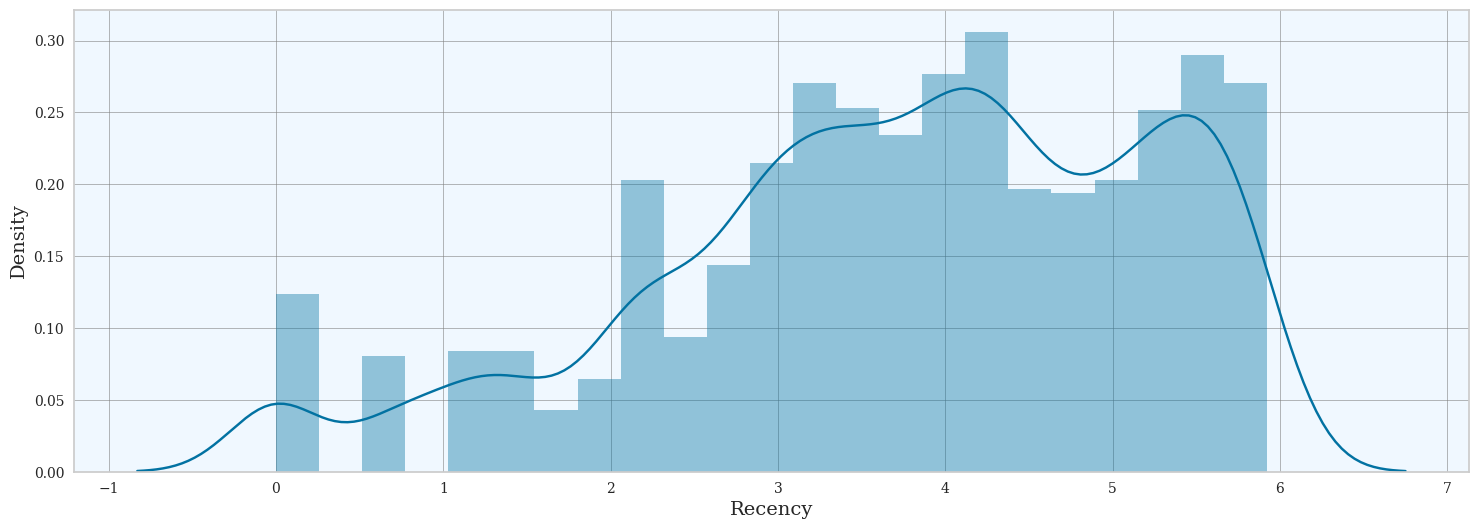

In [ ]:
# Data distribution after normalizing the Recency data
plt.figure(figsize = (18, 6))
ax = sns.distplot(Log_Data['Recency'])
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Recency", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Density', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.show()

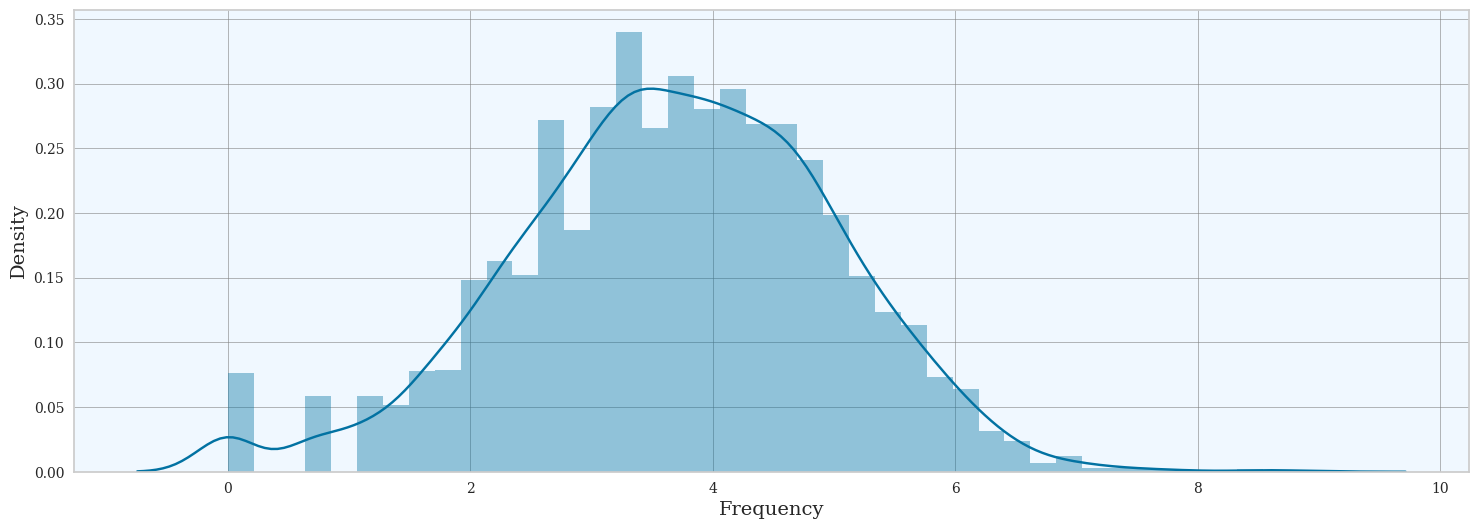

In [ ]:
# Data distribution after normalizing the Frequency data
plt.figure(figsize = (18, 6))
ax = sns.distplot(Log_Data.query('Frequency < 1000')['Frequency'])
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Frequency", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Density', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.show()

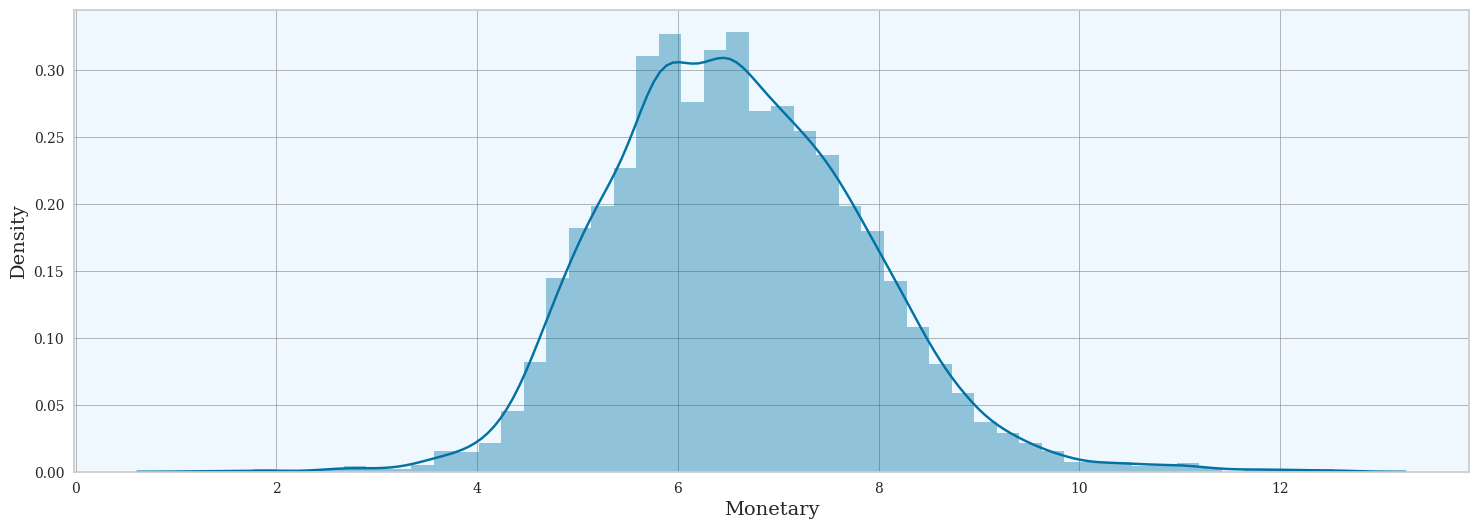

In [ ]:
# Data distribution after normalizing the Monetary data
plt.figure(figsize = (18, 6))
ax = sns.distplot(Log_Data.query('Monetary < 10000')['Monetary'])
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Monetary", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Density', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.show()

#### 1. Why did you choose specific charts?
#### Here, I wanted to observe the distribution of Recency, Monetary, and Frequency after applying log transformation individually, so I utilized a distribution plot.

#### 2. What insight(s) did you find from the chart?
#### We can visualize that the Recency, Monetary, and Frequency distributions are close to normal.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate features to minimize feature correlation and create new ones
from datetime import datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour


In [ ]:
df['TotalAmount'] = df['Quantity']*df['UnitPrice']

#### 2. Feature Selection

#### What feature selection methods have you used and why?
#### Here, I have not employed any feature selection as we have a very small number of columns.


#### Which features did you find important and why?
#### In this dataset, Unit Price, Quantity, and Total Amount are particularly crucial as these columns provide insight into product sales status and the profitability of the business.

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Standardizing the data to the same scale
scaler = StandardScaler()
Scaled_Data = scaler.fit_transform(Log_Data)

# Transform it back into a dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMscores.index, columns = Log_Data.columns)

#### Which method did you use to scale your data and why?
#### I used Standard Scaler to scale my data because it transforms the data to have a mean of 0 and a standard deviation of 1. In short, it standardizes the data. Standardization is useful for data with negative values and arranges the data in a standard normal distribution.

## **7. ML Model Implementation**

## K-Means Clustering

### Applying the Silhouette Score method to Recency and Monetary

In [ ]:
# Applying the Silhouette score method to Recency and Monetary
features_rec_mon = ['Recency_log', 'Monetary_log']
X_features_rec_mon = RFMscores[features_rec_mon].values

# Fit the model
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon
sil_score_list = []

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters = n_clusters)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_

# Check the silhouette score on clusters
  score = silhouette_score(X,preds)
  sil_score_list.append(score)
  print(' For n_clusters = {}, silhouette sore is{}'.format (n_clusters, score))

 For n_clusters = 2, silhouette sore is0.421461308316105
 For n_clusters = 3, silhouette sore is0.3426000809503736
 For n_clusters = 4, silhouette sore is0.36494104664274657
 For n_clusters = 5, silhouette sore is0.3353612106637567
 For n_clusters = 6, silhouette sore is0.344250755765014
 For n_clusters = 7, silhouette sore is0.3481190022361448
 For n_clusters = 8, silhouette sore is0.336570733594604
 For n_clusters = 9, silhouette sore is0.3456508414797465
 For n_clusters = 10, silhouette sore is0.34881747929020823
 For n_clusters = 11, silhouette sore is0.3381665958230367
 For n_clusters = 12, silhouette sore is0.34266878636060016
 For n_clusters = 13, silhouette sore is0.34101352280682323
 For n_clusters = 14, silhouette sore is0.3407742462952453
 For n_clusters = 15, silhouette sore is0.3351867217726863


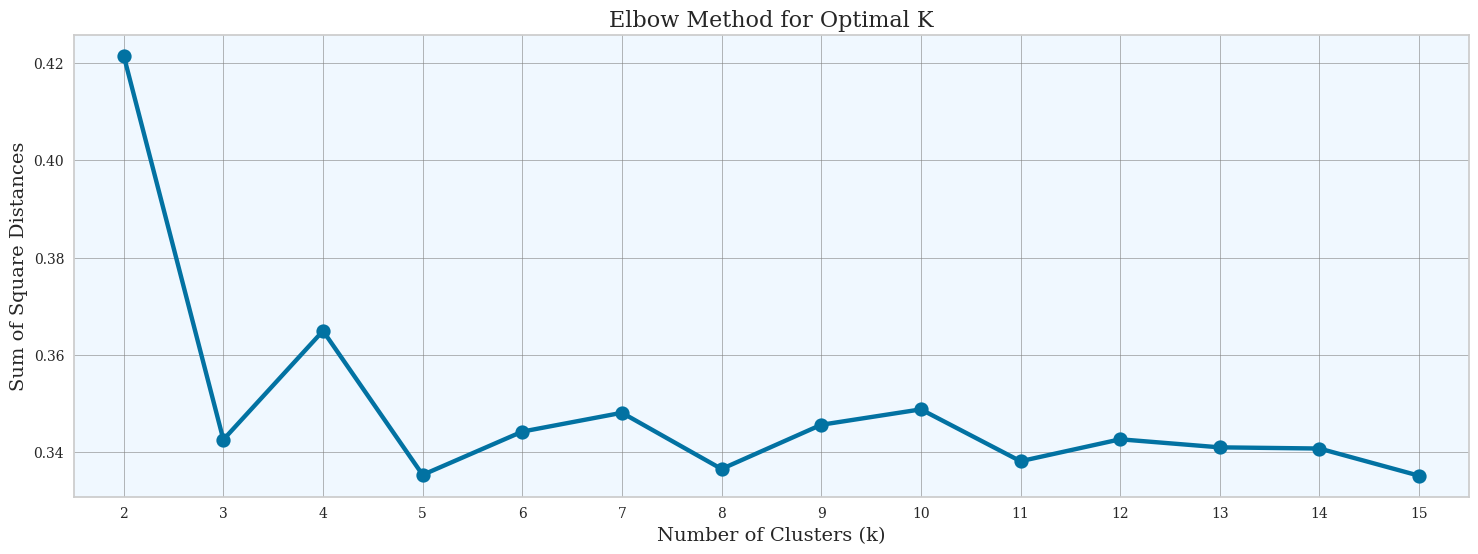

In [ ]:
# Plot the graph for the sum of square distance values and number of clusters
plt.figure(figsize = (18, 6))
ax = sns.pointplot(x = range_n_clusters , y = sil_score_list )
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Number of Clusters (k)", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Sum of Square Distances', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Elbow Method for Optimal K', fontname = 'serif', fontsize = 16)
plt.show()

#### 1. Explain the ML model used and its performance using an evaluation metric score chart.
#### KNN can be defined as the task of identifying subgroups in the data, where data points within the same subgroup (cluster) are very similar, while data points in different clusters are notably different.
#### Calculation of Silhouette Score

#### The silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means, assessing how well samples are clustered with others that are similar to each other. The silhouette score is calculated for each sample in different clusters.
#### The maximum silhouette score is for 2 clusters, i.e., 0.42, and then for 4 clusters, i.e., 0.364.

### Elbow Method

In [ ]:
# Applying the Elbow Method on Recency and Monetary
features_rec_mon = ['Recency_log', 'Monetary_log']
X_features_rec_mon = RFMscores[features_rec_mon].values
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon
sum_of_sq_dist = {}
for k in range(1, 15):
    km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

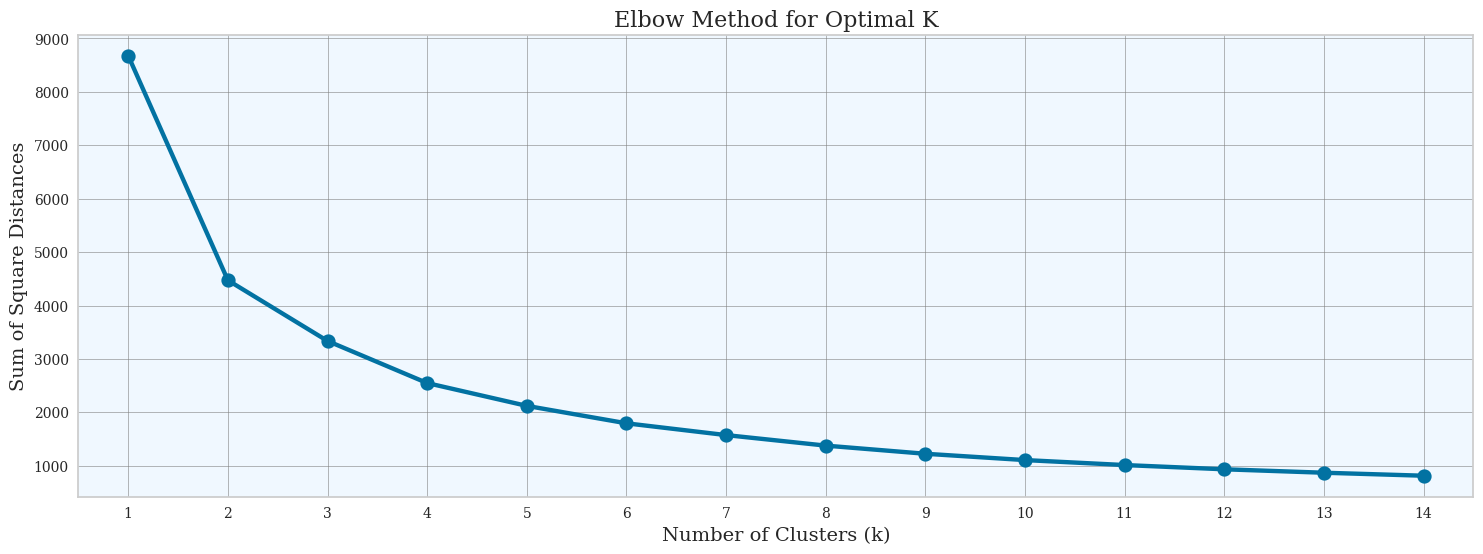

In [ ]:
# Plot the graph for the sum of square distance values and the number of clusters
plt.figure(figsize = (18, 6))
ax = sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Number of Clusters (k)", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Sum of Square Distances', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Elbow Method for Optimal K', fontname = 'serif', fontsize = 16)
plt.show()

#### 1. Explain the ML model used and its performance using an evaluation metric score chart.
#### The Elbow method is one of the most famous techniques used to select the right value of k and improve model performance. We also perform hyperparameter tuning to choose the best value of k. Let's explore how the elbow method works. It's an empirical approach to determining the optimal value of k. The method selects a range of values and evaluates the best among them. It calculates the sum of the squared distances of points and computes the average distance.
#### When the value of k is 1, the within-cluster sum of squares will be high. As the value of k increases, the within-cluster sum of squares value will decrease.
#### Finally, we will plot a graph between k-values and the within-cluster sum of squares to determine the optimal k value. We will carefully examine the graph, and at some point, we will notice a sharp decrease. That point will be considered as the optimal value of k.

### Considering the best value of k to be 2

In [ ]:
# Taking the number of clusters as 2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

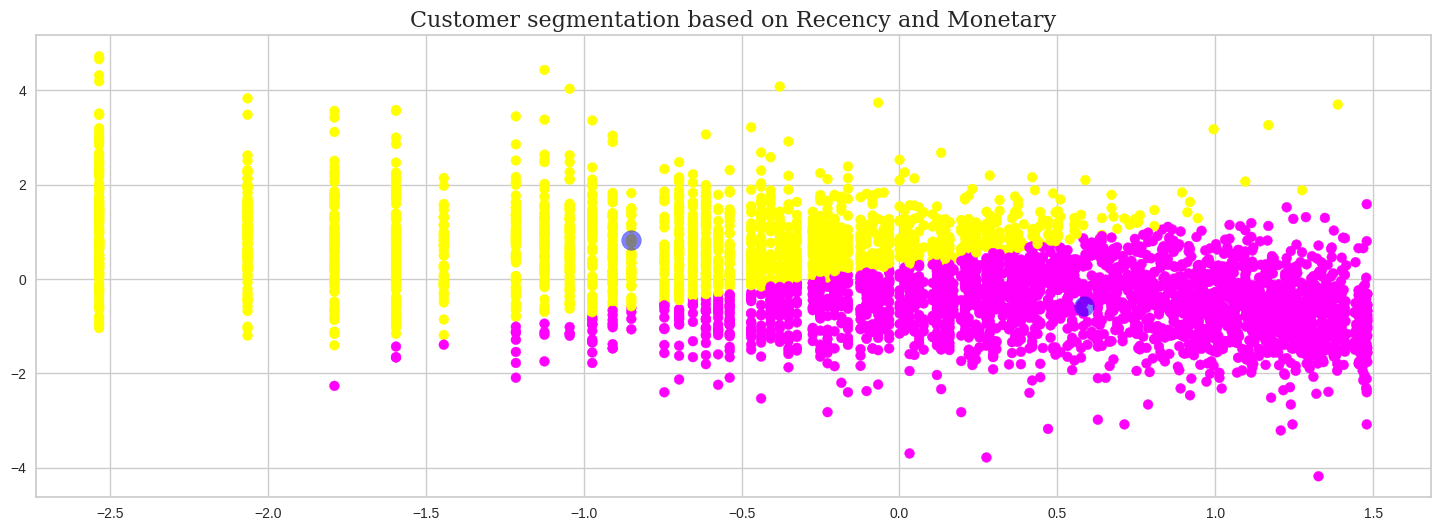

In [ ]:
# Plotting customer segmentation by setting k = 2
plt.figure(figsize = (18, 6))
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 200, alpha = 0.5)
plt.title('Customer segmentation based on Recency and Monetary', fontname = 'serif', fontsize = 16)
plt.show()

#### We observe that customers are well separated when clustered based on Recency and Monetary

### Considering the best value of k to be 3

In [ ]:
# Taking the number of clusters as 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

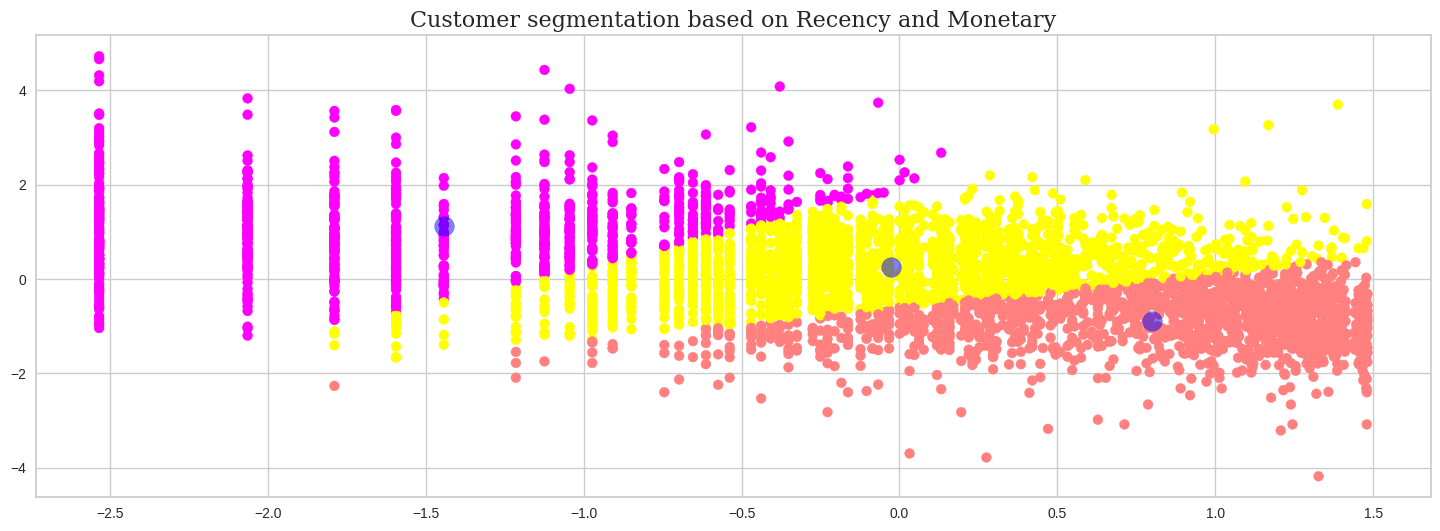

In [ ]:
# Plotting customer segmentation by setting k = 3
plt.figure(figsize = (18, 6))
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'blue', s = 200, alpha = 0.5)
plt.title('Customer segmentation based on Recency and Monetary', fontname = 'serif', fontsize = 16)
plt.show()

#### For k = 3, customers are well separated into clusters

## Implementation of Density-Based Spatial Clustering of Applications with Noise (DBSCAN)

#### DBSCAN on Recency and Monetary

In [ ]:
from sklearn.cluster import DBSCAN

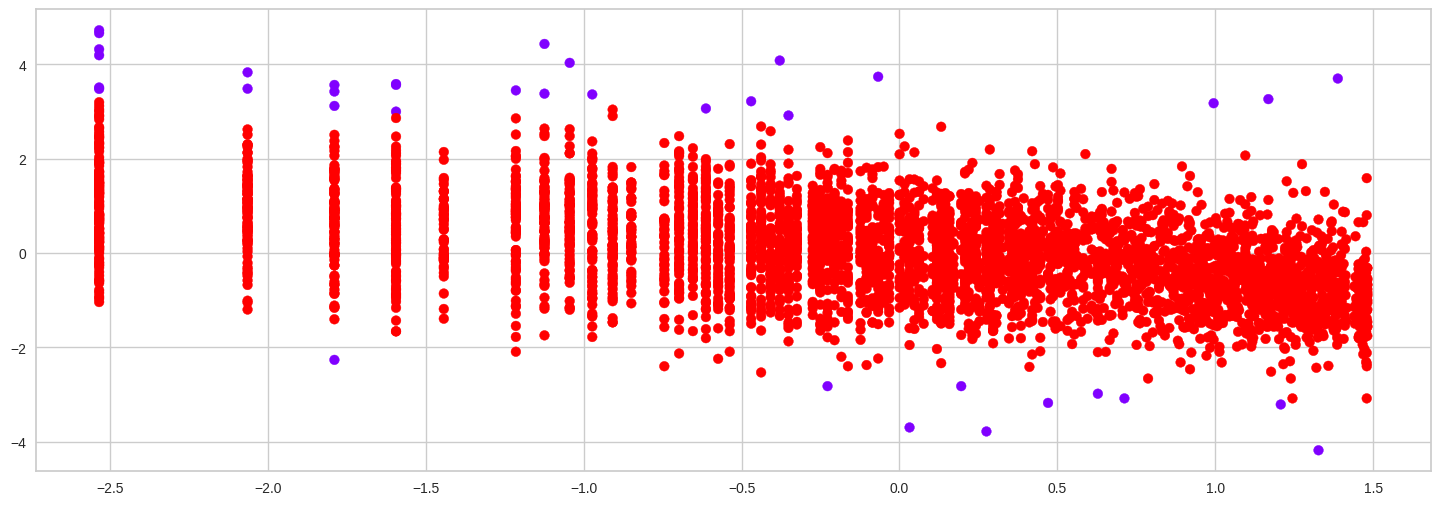

In [ ]:
# Applying DBSCAN on Recency and Monetary
plt.figure(figsize = (18, 6))
y_pred = DBSCAN(eps = 0.5, min_samples = 15).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'rainbow')
plt.show()

#### 1. Explain the ML Model?
#### DBSCAN selects its clusters based on the proximity between neighboring points. In this case, it appears to have categorized the entire dataset as a single cluster. DBSCAN suggests a value of k = 3.
#### It groups densely packed data points into a single cluster and can identify clusters in large spatial datasets by assessing local data point density. One of the key advantages of DBSCAN clustering is its robustness to outliers. Unlike K-Means, it does not require the number of clusters to be specified beforehand.
#### DBSCAN only requires two parameters: epsilon and minPoints. Epsilon defines the radius of the circle around each data point to assess density, while minPoints represents the minimum number of data points needed within that circle for a data point to be classified as a Core point.
#### In higher dimensions, the circle transforms into a hypersphere, where epsilon becomes the radius of the hypersphere, and minPoints remains the minimum number of data points required inside the hypersphere.

### Applying the Silhouette Score method to Frequency and Monetary

In [ ]:
# Applying the silhouette score method on Frequency and Monetary
features_fre_mon = ['Frequency_log','Monetary_log']
X_features_fre_mon = RFMscores[features_fre_mon].values
scaler_fre_mon = preprocessing.StandardScaler()
X_fre_mon = scaler_fre_mon.fit_transform(X_features_fre_mon)
X = X_fre_mon
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters = n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4786630429359192
For n_clusters = 3, silhouette score is 0.40753096292572344
For n_clusters = 4, silhouette score is 0.3722627842547989
For n_clusters = 5, silhouette score is 0.34415525538580743
For n_clusters = 6, silhouette score is 0.36007057035420204
For n_clusters = 7, silhouette score is 0.33895377292875256
For n_clusters = 8, silhouette score is 0.34517396108274306
For n_clusters = 9, silhouette score is 0.33805488112161747
For n_clusters = 10, silhouette score is 0.3613270191425245
For n_clusters = 11, silhouette score is 0.3531795853676457
For n_clusters = 12, silhouette score is 0.3527903550070329
For n_clusters = 13, silhouette score is 0.36471355085642704
For n_clusters = 14, silhouette score is 0.3544858331979363
For n_clusters = 15, silhouette score is 0.3605548078479929


In [ ]:
# Applying the Elbow method on Frequency and Monetary
sum_of_sq_dist = {}
for k in range (1, 15):
  km = KMeans(n_clusters = k, init = 'k-means++', max_iter = 1000)
  km = km.fit(X)
  sum_of_sq_dist[k] = km.inertia_

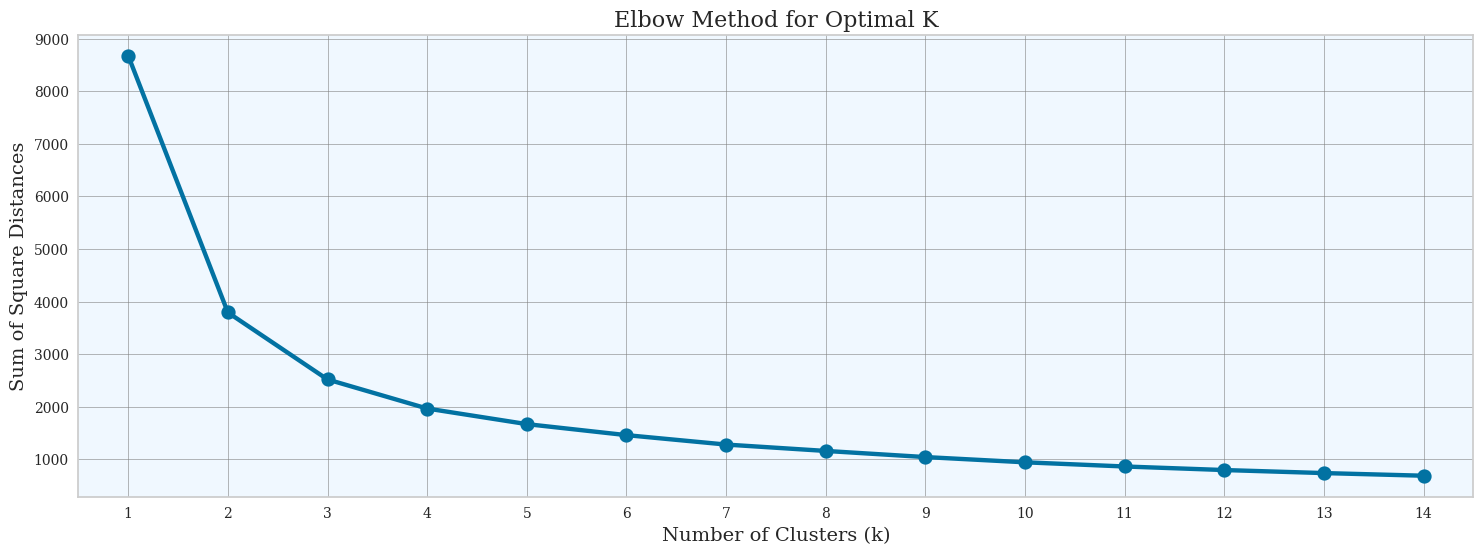

In [ ]:
# Plot the graph for the sum of square distance values and the number of clusters
plt.figure(figsize = (18, 6))
ax = sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Number of Clusters (k)", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Sum of Square Distances', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Elbow Method for Optimal K', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
# Taking the number of clusters as 2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

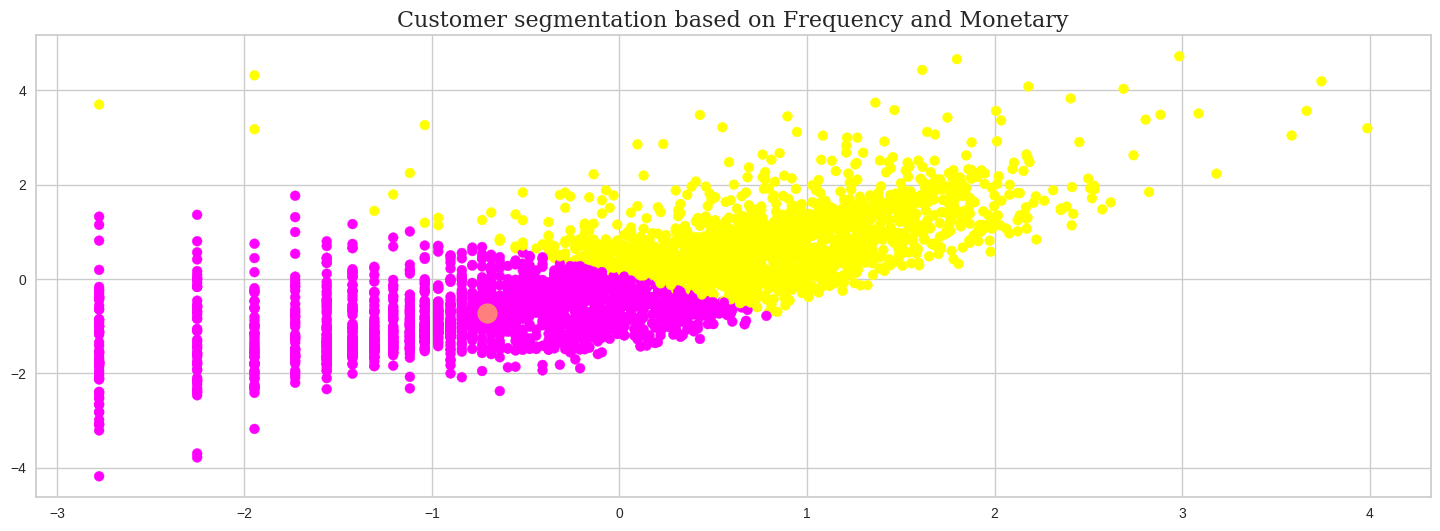

In [ ]:
# Plot customer segmentation based on Frequency and Monetary
plt.figure(figsize = (18, 6))
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'yellow', s = 200, alpha = 0.5)
plt.title('Customer segmentation based on Frequency and Monetary', fontname = 'serif', fontsize = 16)
plt.show()

#### Customers are well segmented when k = 2 for Frequency and Monetary

In [ ]:
# Taking the number of clusters as 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

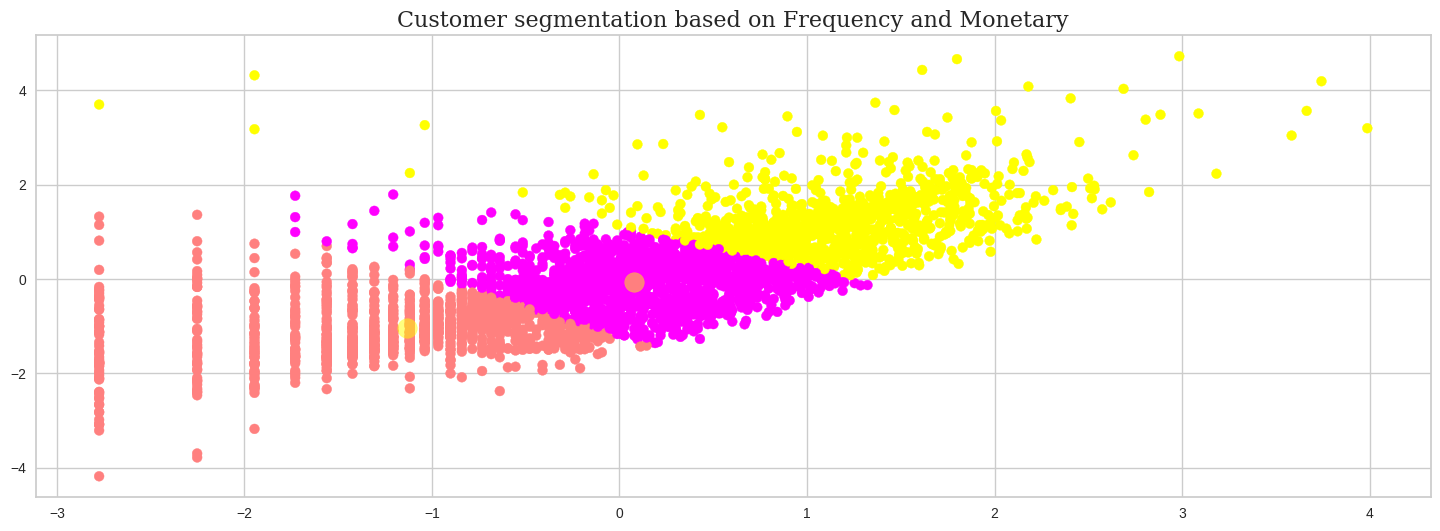

In [ ]:
# Plot customer segmentation based on Frequency and Monetary
plt.figure(figsize = (18, 6))
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'spring')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'yellow', s = 200, alpha = 0.5)
plt.title('Customer segmentation based on Frequency and Monetary', fontname = 'serif', fontsize = 16)
plt.show()

#### Customers are well segmented when k = 3 for Frequency and Monetary.

## DBSCAN on Frequency and Monetary

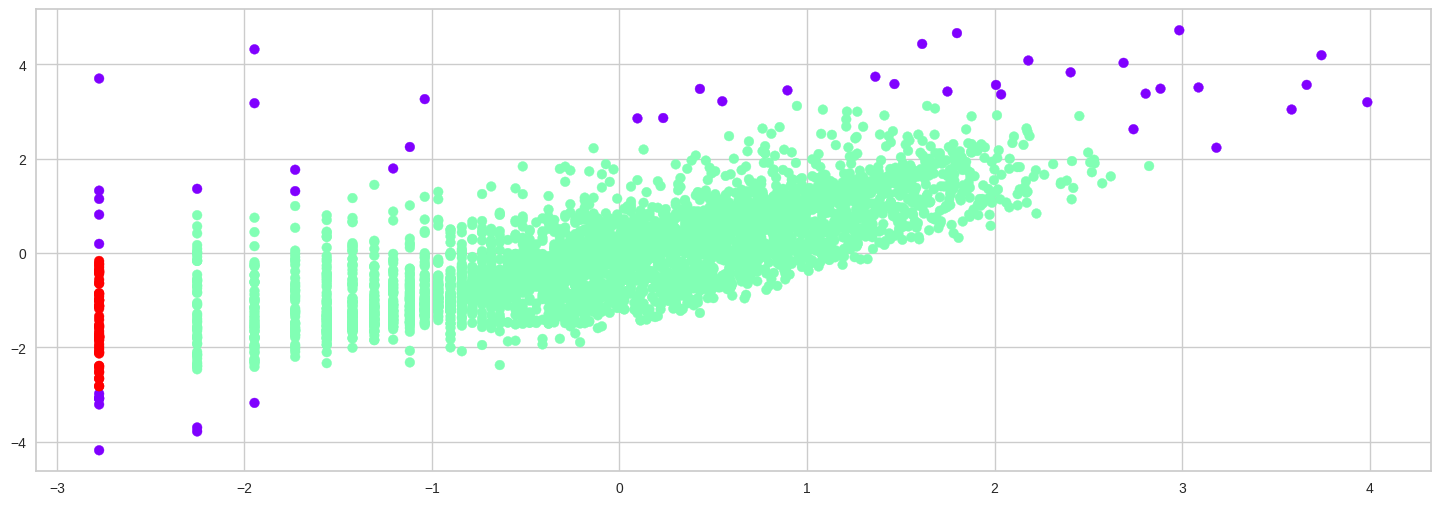

In [ ]:
# Applying the DBSCAN method on Frequency and Monetary
plt.figure(figsize = (18, 6))
y_pred = DBSCAN(eps = 0.5, min_samples = 15).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'rainbow')
plt.show()

#### DBSCAN selects its clusters based on the proximity between nearest points. Here, it appears that DBSCAN has divided the entire dataset into 3 clusters. The DBSCAN algorithm suggests a value of k = 3.


## Applying the Silhouette Method on Recency, Frequency, and Monetary

In [ ]:
# Apply Silhouette on RFM
feature_vector = ['Recency_log', 'Frequency_log', 'Monetary_log']
X_features = RFMscores[feature_vector].values
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.3956478042246982
For n_clusters = 3 The average silhouette_score is : 0.3049826724447913
For n_clusters = 4 The average silhouette_score is : 0.30279724233096916
For n_clusters = 5 The average silhouette_score is : 0.2785519277480847
For n_clusters = 6 The average silhouette_score is : 0.2789560652501828
For n_clusters = 7 The average silhouette_score is : 0.2613208163968789
For n_clusters = 8 The average silhouette_score is : 0.2640918249728342
For n_clusters = 9 The average silhouette_score is : 0.2585642595481418
For n_clusters = 10 The average silhouette_score is : 0.2644733794304285
For n_clusters = 11 The average silhouette_score is : 0.2592423011915937
For n_clusters = 12 The average silhouette_score is : 0.26503813251658404
For n_clusters = 13 The average silhouette_score is : 0.2621555416679574
For n_clusters = 14 The average silhouette_score is : 0.26140947155997746
For n_clusters = 15 The average silhouette_score is : 0.

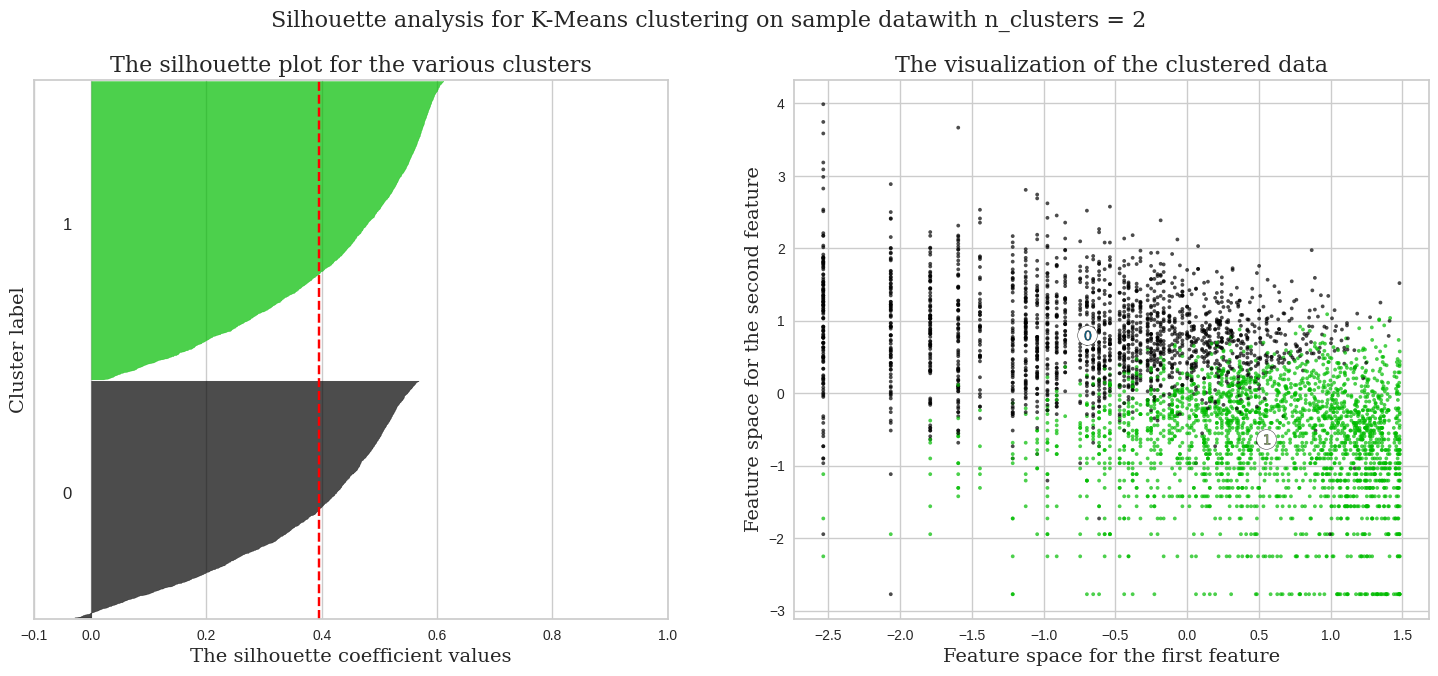

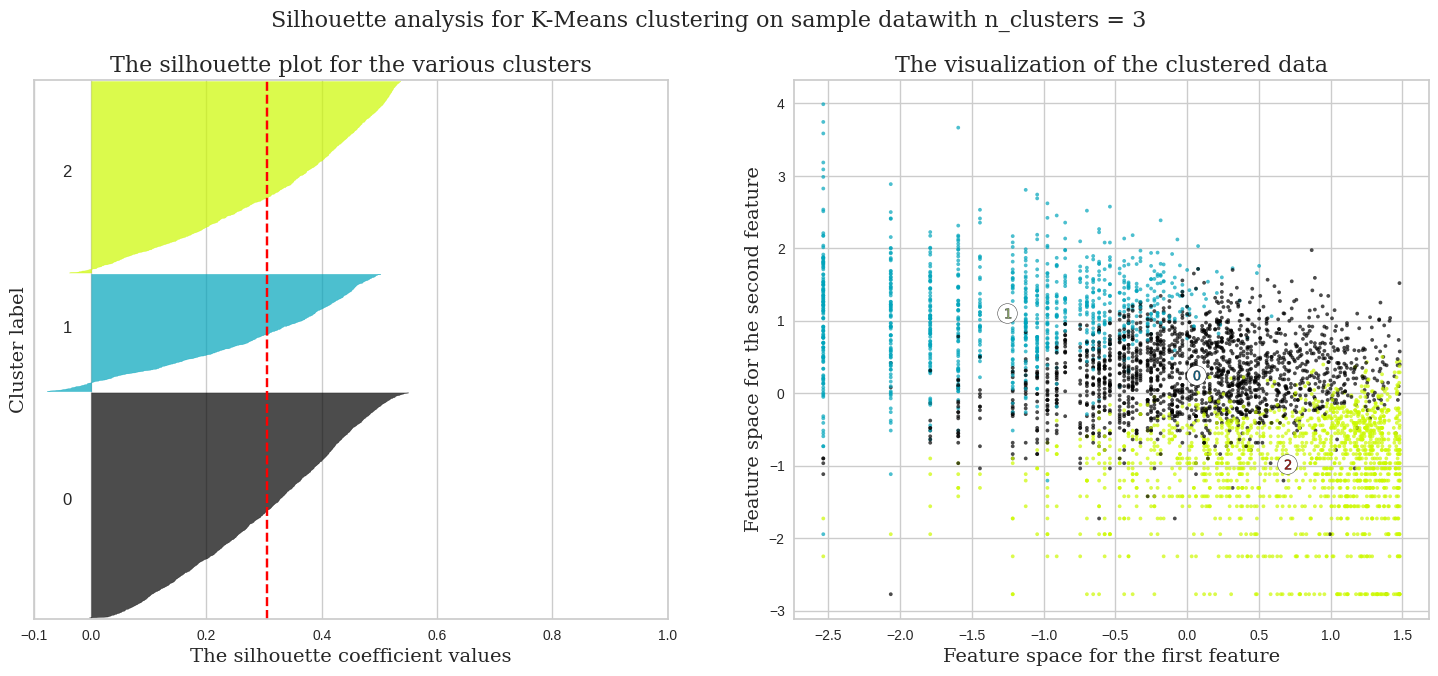

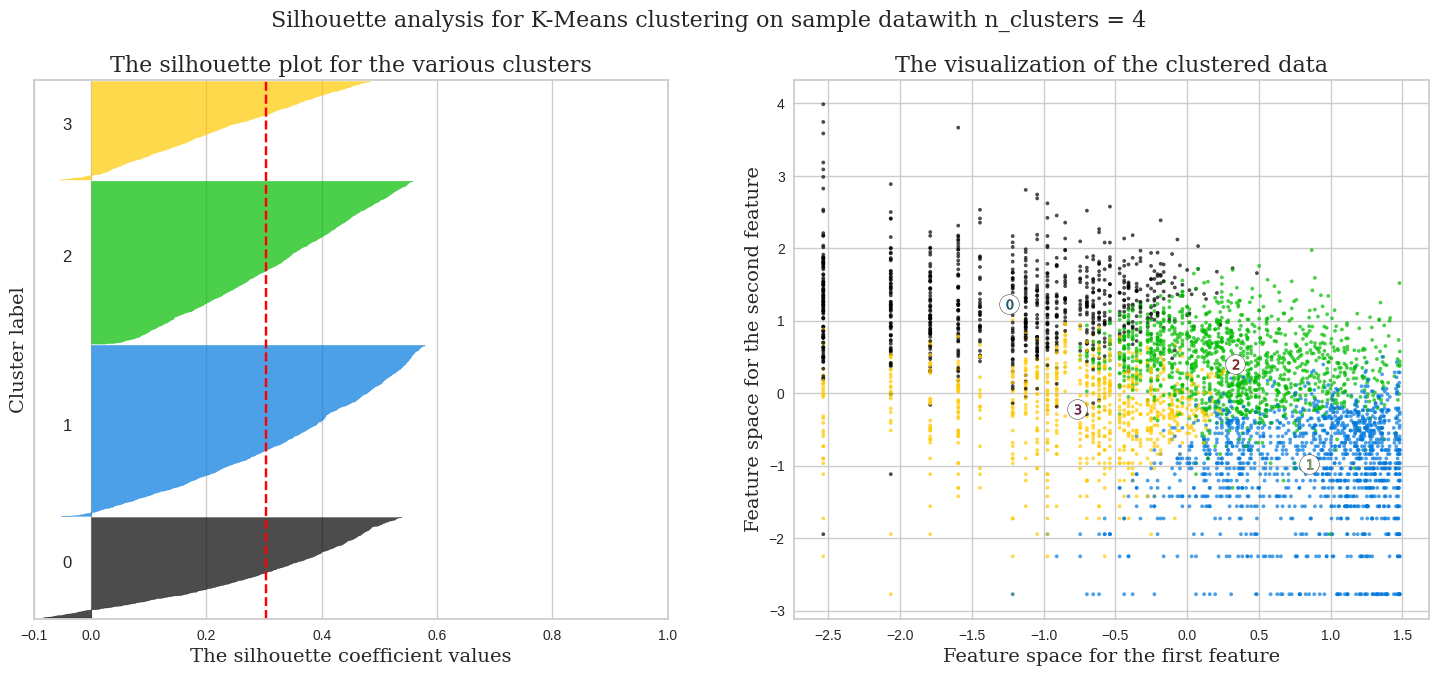

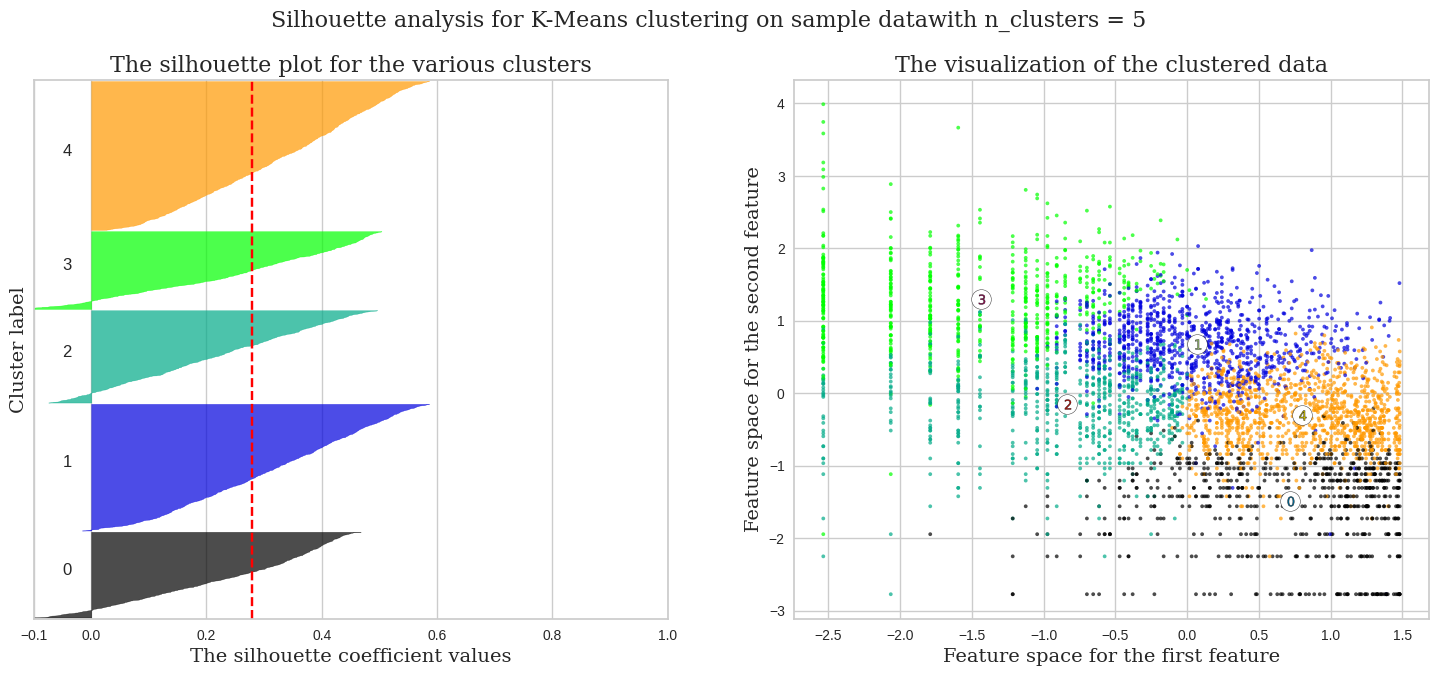

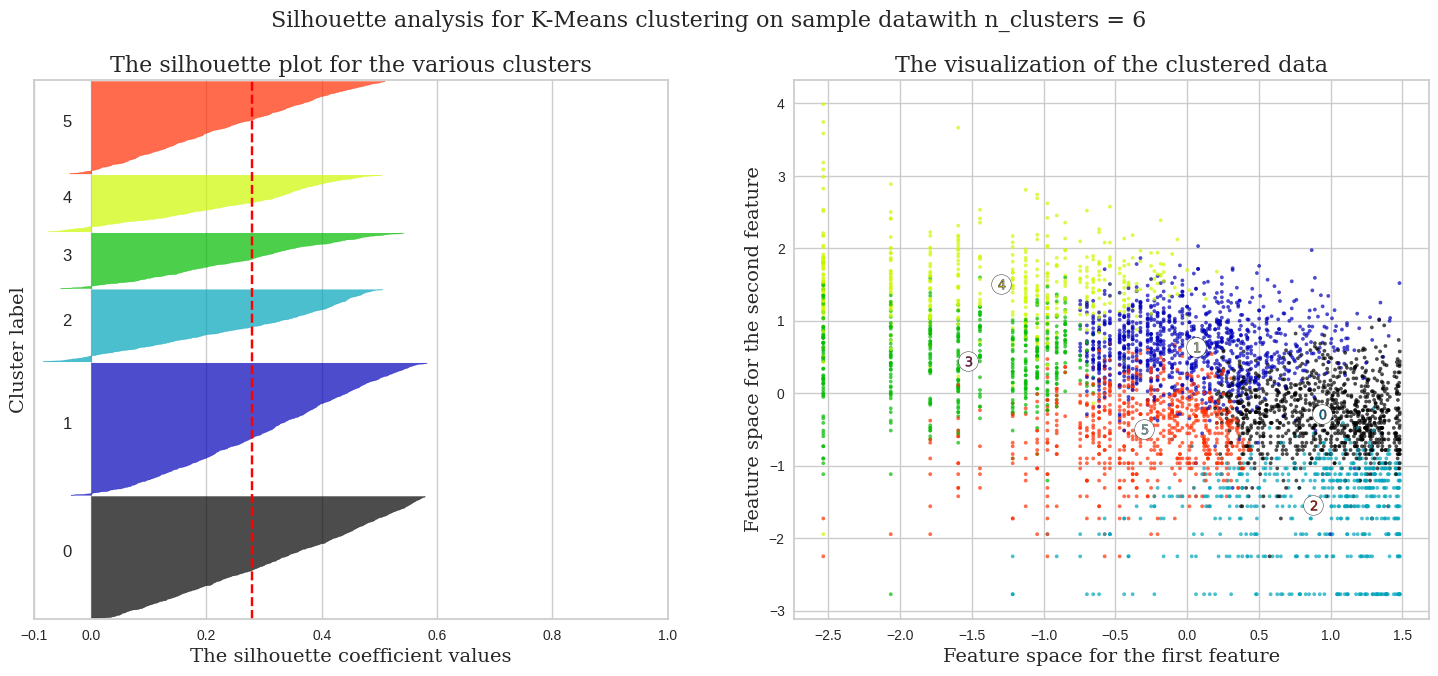

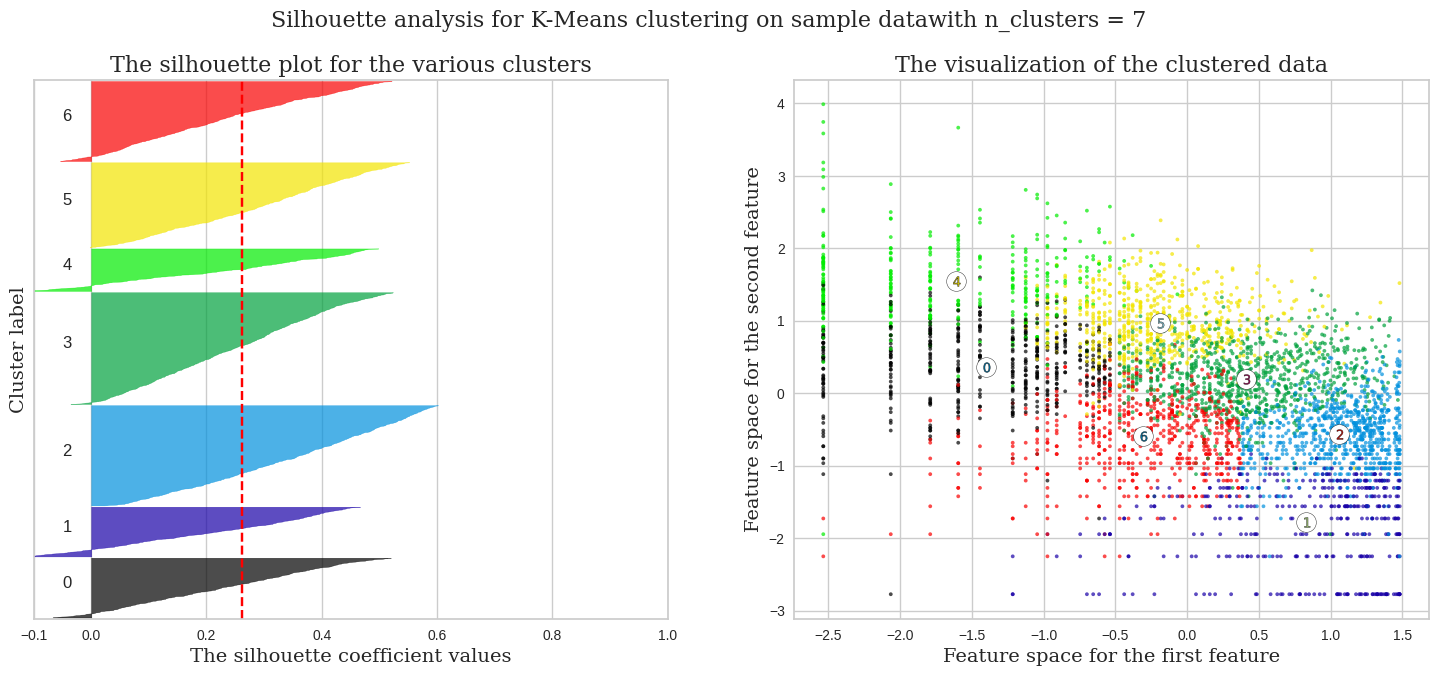

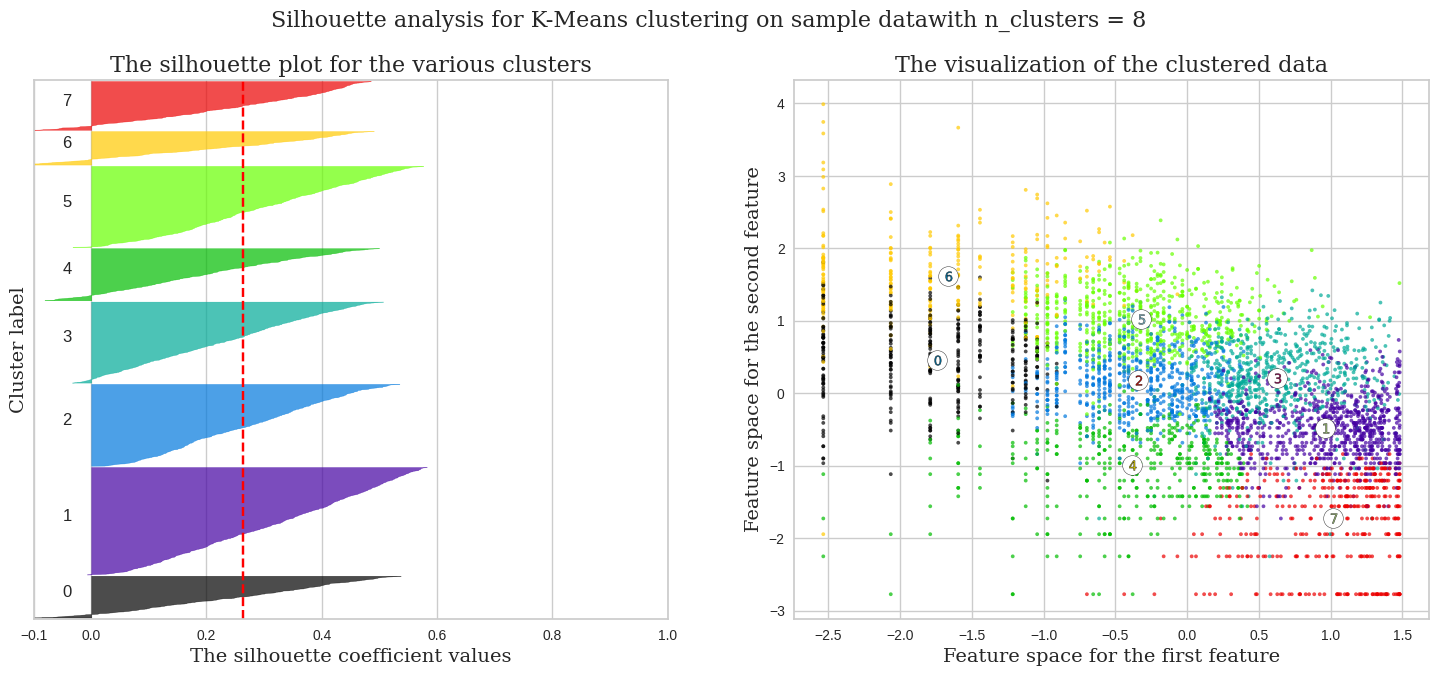

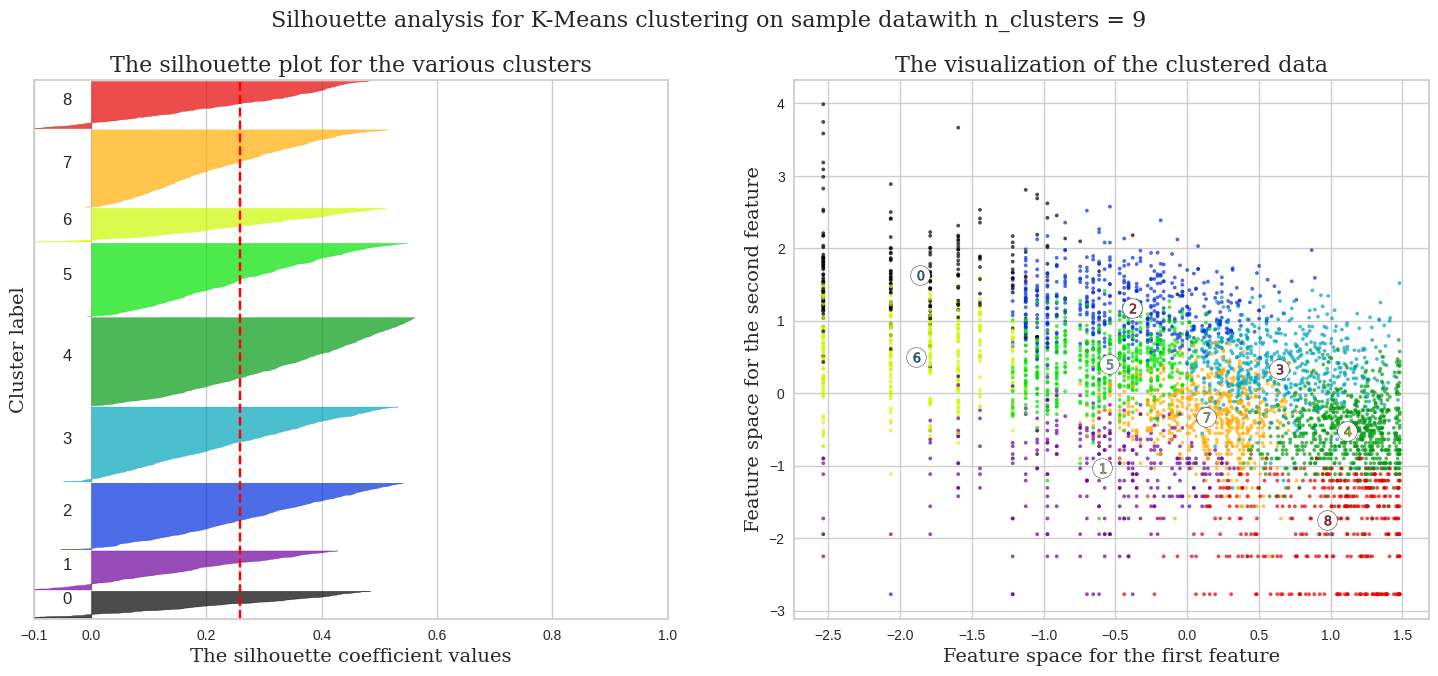

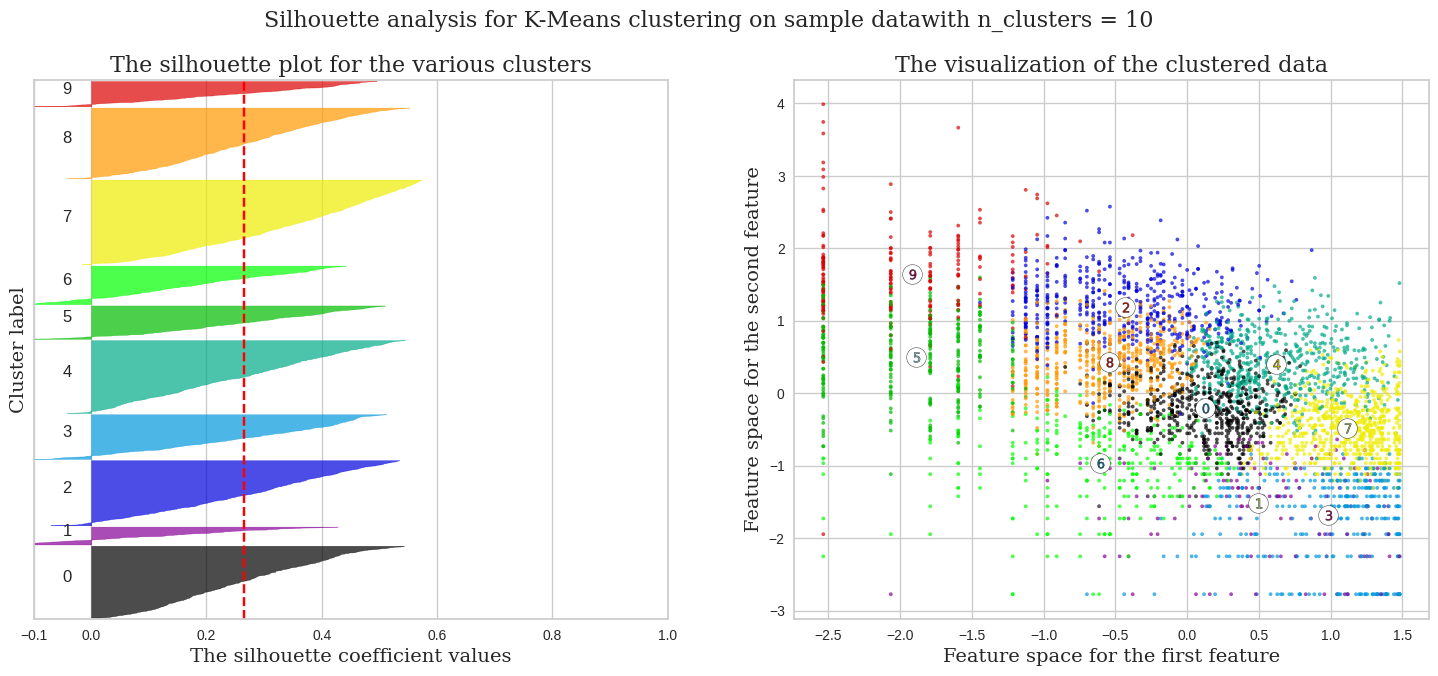

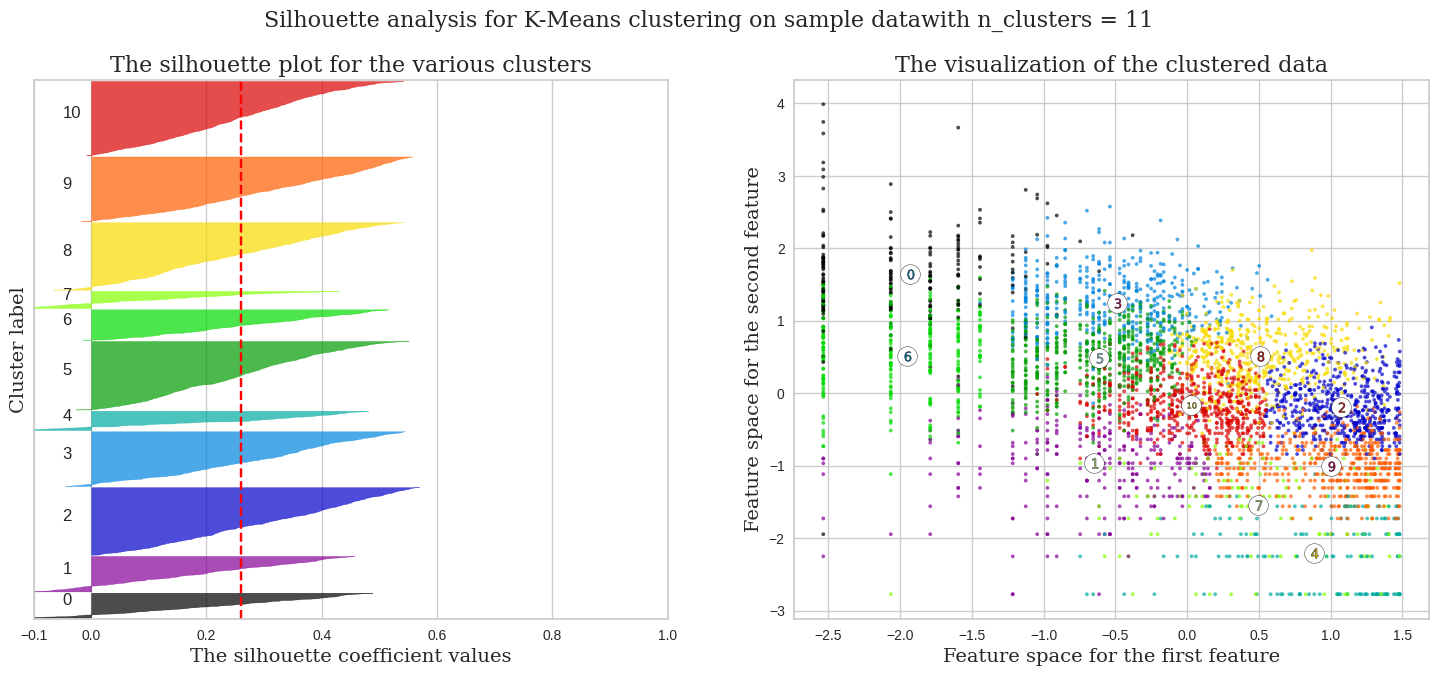

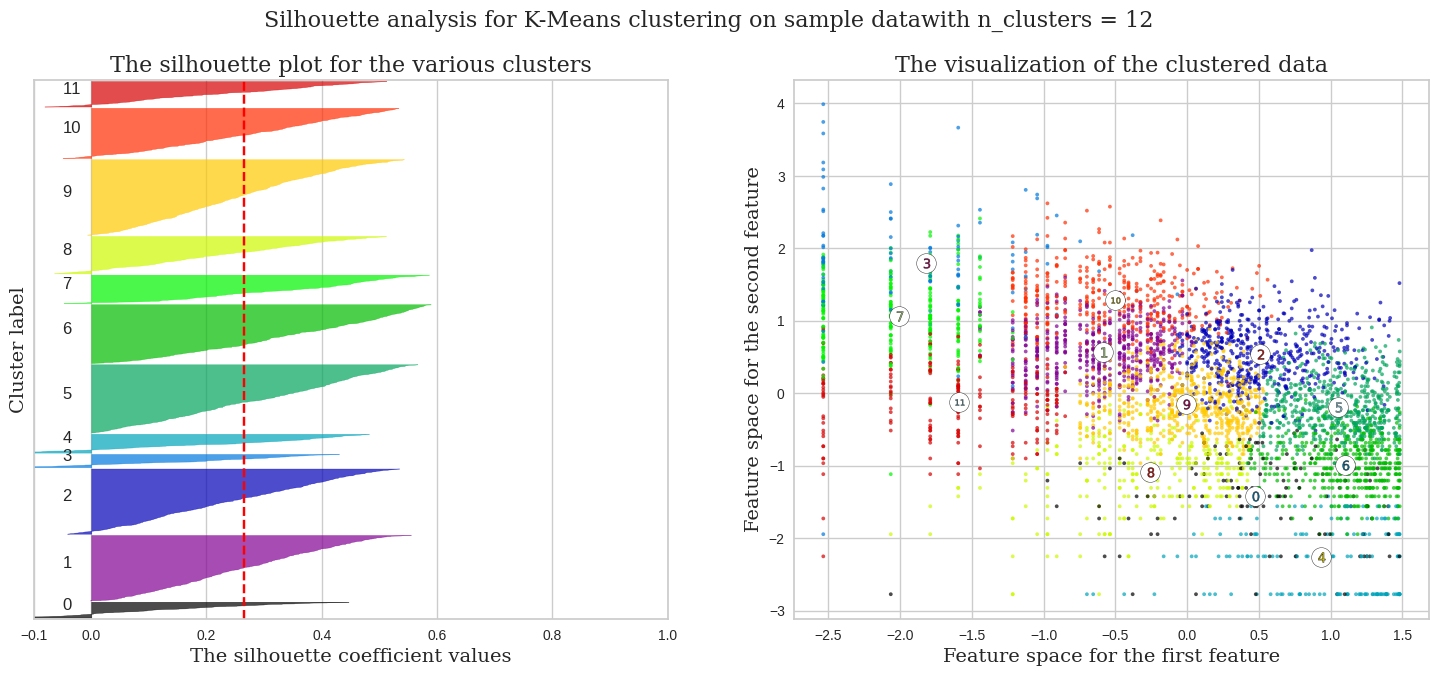

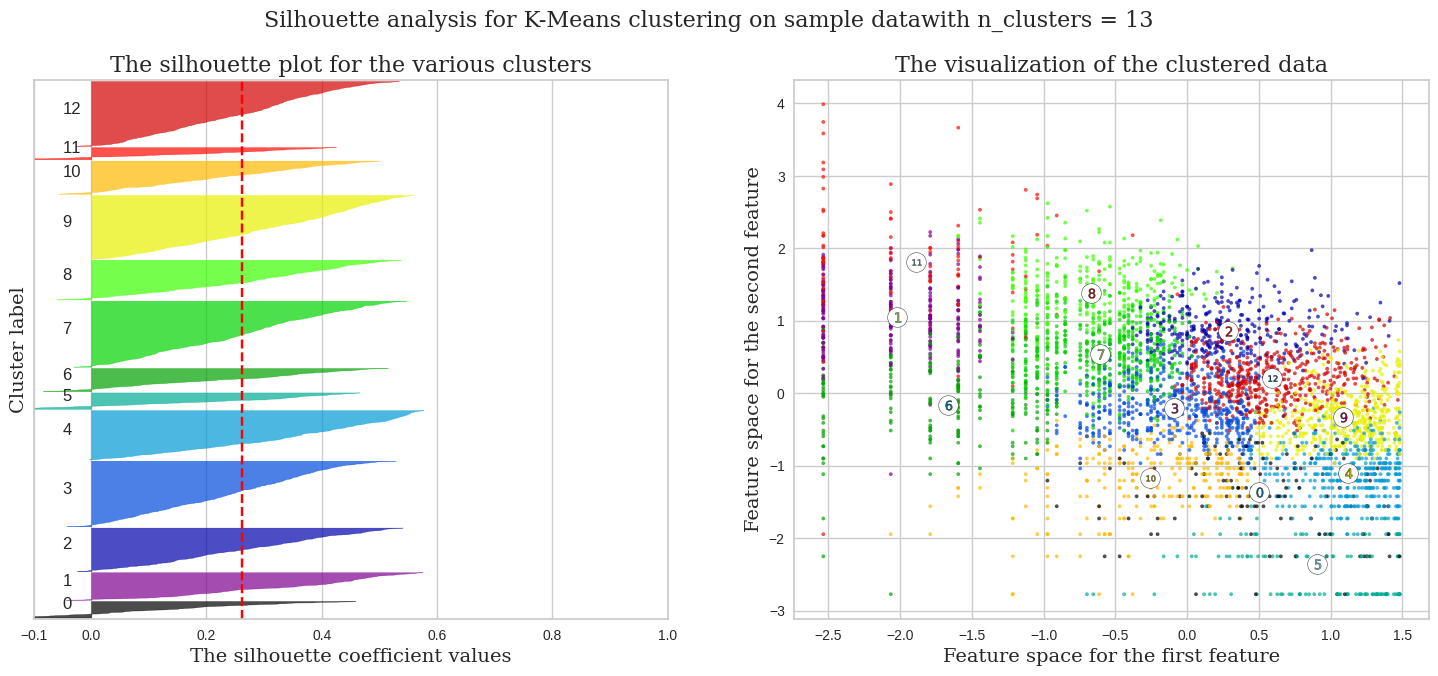

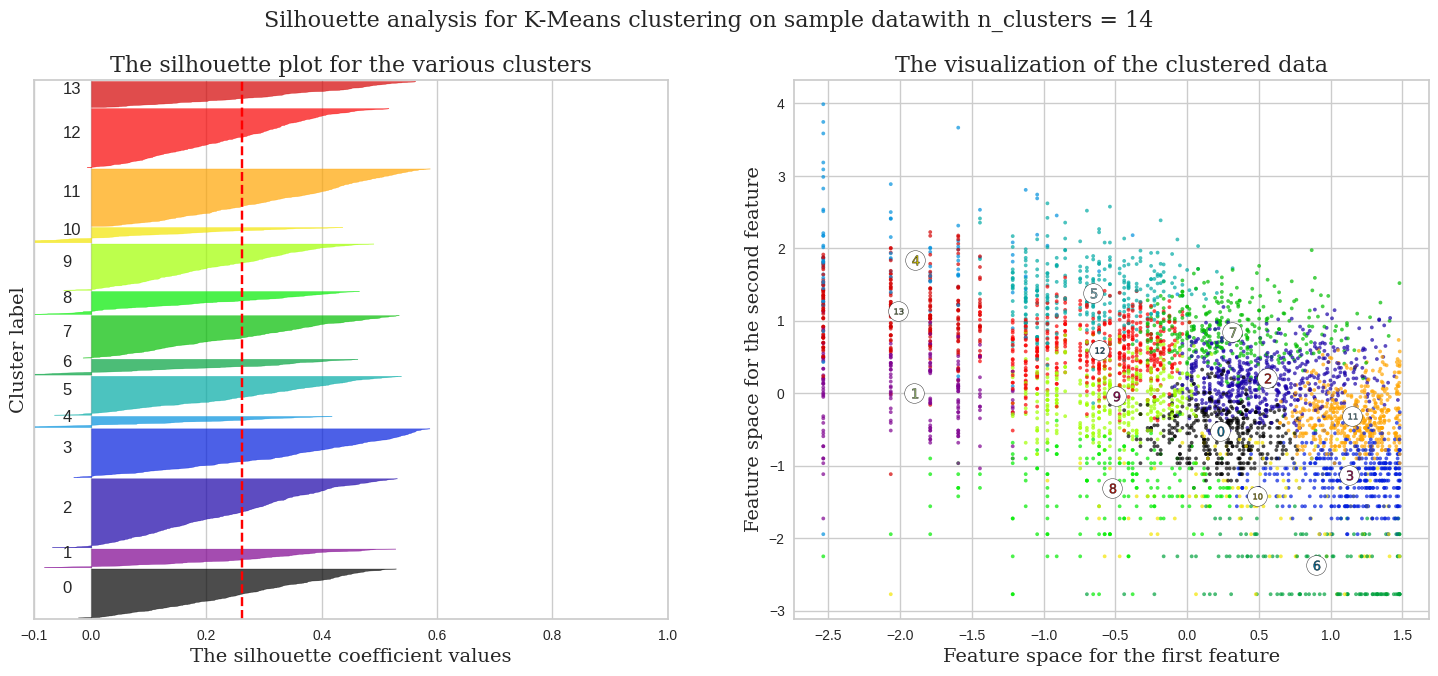

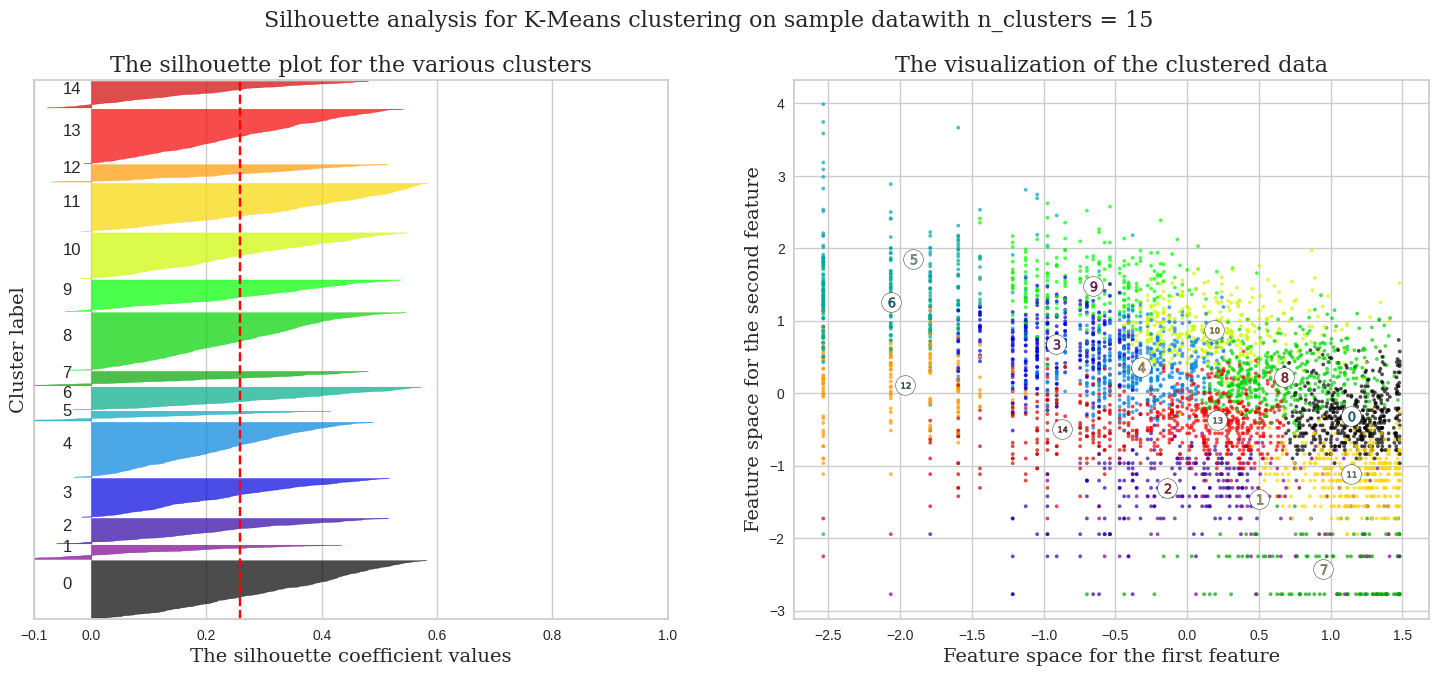

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

for n_clusters in range_n_clusters:

# Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

# The first subplot is the Silhouette plot
# The Silhouette coefficient can range from -1 to 1, but in this example, all...
# lie within the range of [-0.1, 1]
    ax1.set_xlim([-0.1, 1])

# The formula "(n_clusters + 1) * 10" is used for inserting blank space between Silhouette
# Plots of individual clusters to demarcate them clearly
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

# Initialize the clusterer with the value of n_clusters and a random generator
# Seed of 10 for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

# The silhouette_score provides the average value for all the samples
# This provides insight into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

# Aggregate the Silhouette scores for samples belonging to cluster i and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

# Label the silhouette plots with their cluster numbers in the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

# Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters", fontname = 'serif', fontsize = 16)
    ax1.set_xlabel("The silhouette coefficient values", fontname = 'serif', fontsize = 14)
    ax1.set_ylabel("Cluster label", fontname = 'serif', fontsize = 14)

# The vertical line represents the average silhouette score of all the values
    ax1.axvline(x = silhouette_avg, color = "red", linestyle = "--")

    # Clear the y-axis labels/ticks
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# The second plot shows the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker = '.', s = 30, lw = 0, alpha = 0.7,
                c = colors, edgecolor = 'k')

# Labeling the clusters
    centers = clusterer.cluster_centers_

# Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker = 'o',
                c = "white", alpha = 1, s = 200, edgecolor = 'k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker = '$%d$' % i, alpha = 1,
                    s = 50, edgecolor = 'k')

    ax2.set_title("The visualization of the clustered data", fontname = 'serif', fontsize = 16)
    ax2.set_xlabel("Feature space for the first feature", fontname = 'serif', fontsize = 14)
    ax2.set_ylabel("Feature space for the second feature", fontname = 'serif', fontsize = 14)
    plt.suptitle(("Silhouette analysis for K-Means clustering on sample data"
                  "with n_clusters = %d" % n_clusters), fontname = 'serif', fontsize = 16)
plt.show()

#### Customer segmentation based on Recency, Monetary, and Frequency

In [ ]:
# Customer segmentation by setting k = 2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

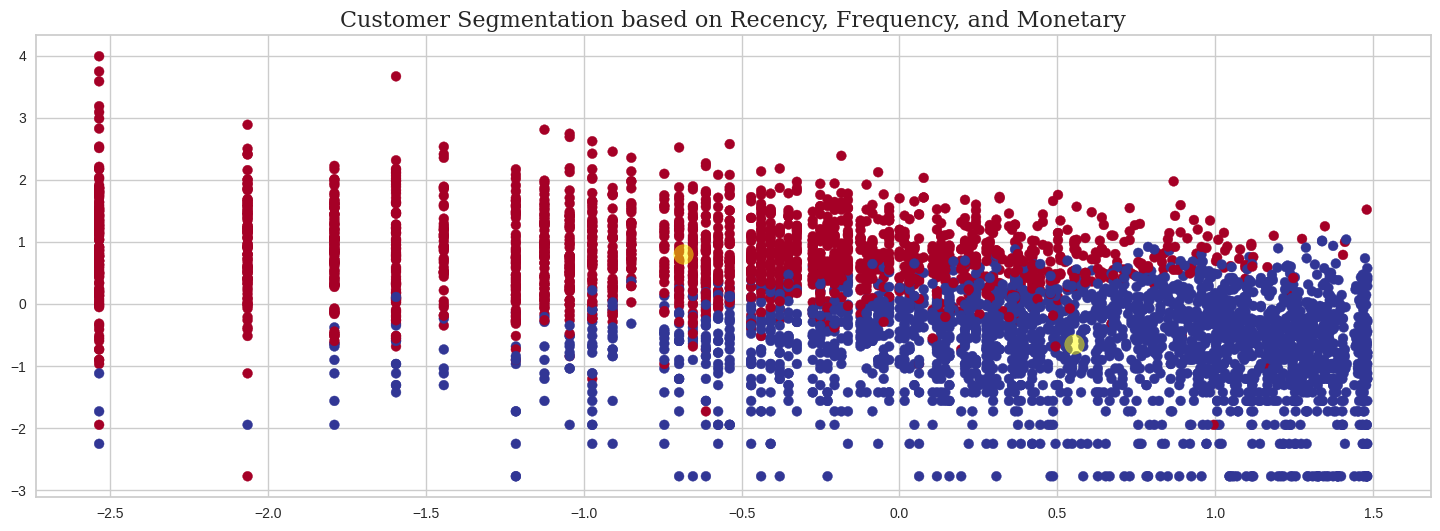

In [ ]:
# Plot segmentation
plt.figure(figsize = (18, 6))
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'RdYlBu')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'yellow', s = 200, alpha = 0.5)
plt.title('Customer Segmentation based on Recency, Frequency, and Monetary', fontname = 'serif', fontsize = 16)
plt.show()

## Elbow Method

In [ ]:
# Apply the Elbow method on Recency, Frequency, and Monetary
sum_of_sq_dist = {}
for k in range(1, 15):
    km = KMeans(n_clusters = k, init= 'k-means++', max_iter = 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_

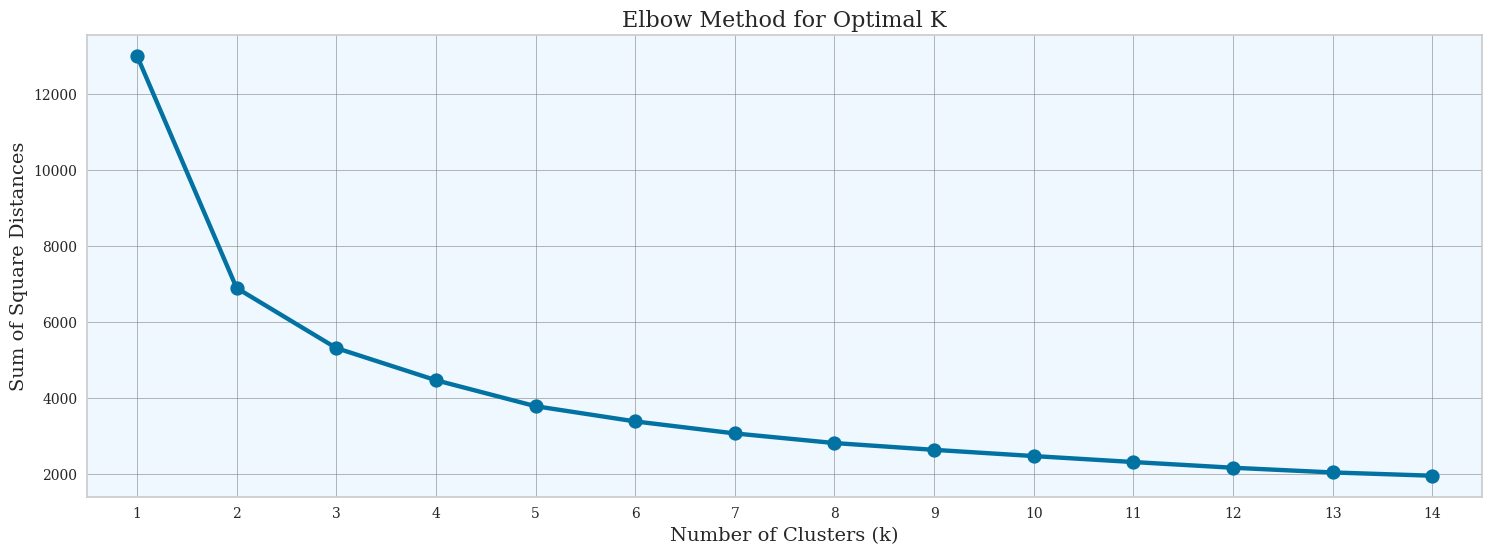

In [ ]:
# Plot the graph for the sum of square distance values and the number of clusters
plt.figure(figsize = (18, 6))
ax = sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
ax.patch.set_facecolor('aliceblue')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Number of Clusters (k)", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Sum of Square Distances', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Elbow Method for Optimal K', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
# Build the clustering model
KMean_clust = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 1000)
KMean_clust.fit(X)

KMeans(max_iter=1000, n_clusters=2)

In [ ]:
# Find the clusters for the observation provided in the dataset
RFMscores['Cluster'] = KMean_clust.labels_
RFMscores.head(15)

Recency  Frequency  Monetary  R  F  M RFMGroup  RFMScore  \
CustomerID                                                             
12346.0         325          1  77183.60  4  4  1      441         9   
12347.0           2        182   4310.00  1  1  1      111         3   
12348.0          75         31   1797.24  3  3  1      331         7   
12349.0          18         73   1757.55  2  2  1      221         5   
12350.0         310         17    334.40  4  4  3      443        11   
12352.0          36         85   2506.04  2  2  1      221         5   
12353.0         204          4     89.00  4  4  4      444        12   
12354.0         232         58   1079.40  4  2  2      422         8   
12355.0         214         13    459.40  4  4  3      443        11   
12356.0          22         59   2811.43  2  2  1      221         5   
12357.0          33        131   6207.67  2  1  1      211         4   
12358.0           1         19   1168.06  1  3  2      132         6   
12359.0          57        248   6372.58  3  1  1      311         5   
12360.0          52        129   2662.06  3  1  1      311         5   
12361.0         287         10    189.90  4  4  4      444        12   

            Recency_log  Frequency_log  Monetary_log  Cluster  
CustomerID                                                     
12346.0        5.783825       0.000000     11.253942        0  
12347.0        0.693147       5.204007      8.368693        1  
12348.0        4.317488       3.433987      7.494007        0  
12349.0        2.890372       4.290459      7.471676        1  
12350.0        5.736572       2.833213      5.812338        0  
12352.0        3.583519       4.442651      7.826459        1  
12353.0        5.318120       1.386294      4.488636        0  
12354.0        5.446737       4.060443      6.984161        0  
12355.0        5.365976       2.564949      6.129921        0  
12356.0        3.091042       4.077537      7.941449        1  
12357.0        3.496508       4.875197      8.733541        1  
12358.0        0.000000       2.944439      7.063100        1  
12359.0        4.043051       5.513429      8.759760        1  
12360.0        3.951244       4.859812      7.886856        1  
12361.0        5.659482       2.302585      5.246498        0

In [ ]:
RFMscores.groupby('Cluster').mean()

Recency   Frequency     Monetary         R         F         M  \
Cluster                                                                      
0        140.975509   24.833126   469.732795  3.112080  3.273973  3.253217   
1         30.989632  175.251944  4033.085330  1.722654  1.553136  1.559357   

        RFMGroup  RFMScore  Recency_log  Frequency_log  Monetary_log  
Cluster                                                               
0            inf  9.639269     4.551757       2.829301      5.779728  
1            inf  4.835148     2.719803       4.741820      7.603654

## Dendrogram

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from prettytable import PrettyTable

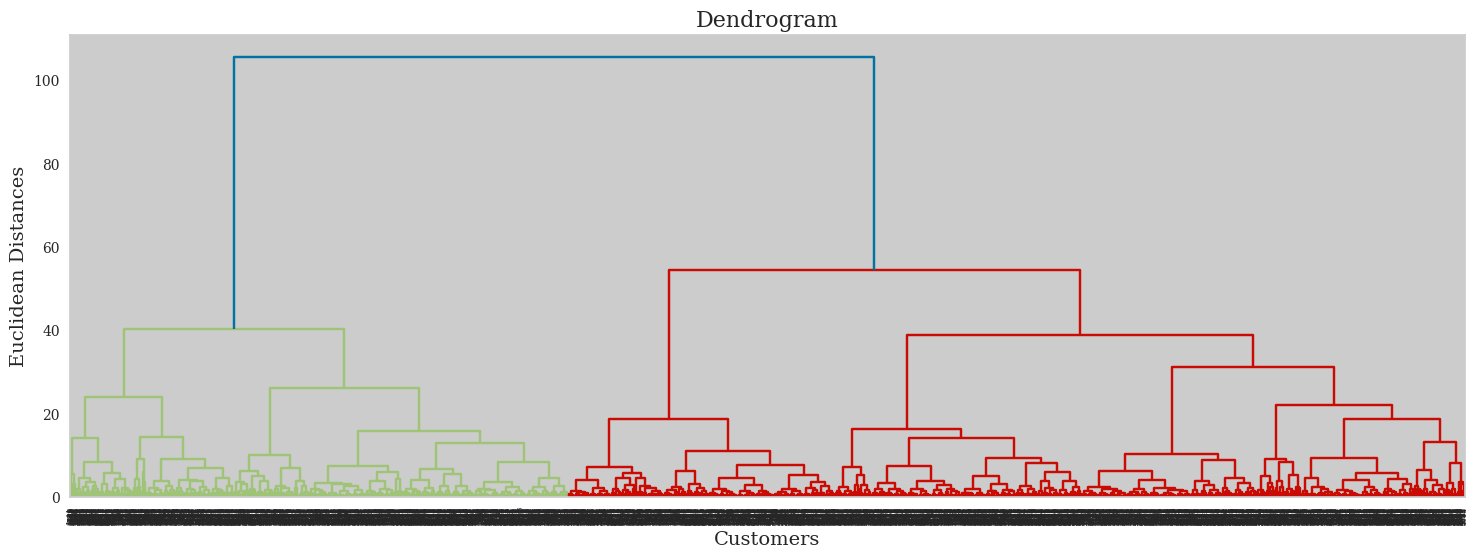

In [ ]:
# Plot the optimal number of clusters using a dendrogram
# Find the largest vertical distance we can make without crossing any other horizontal line
plt.figure(figsize = (18, 6))
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.xlabel("Customers", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Euclidean Distances', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Dendrogram', fontname = 'serif', fontsize = 16)
plt.show()

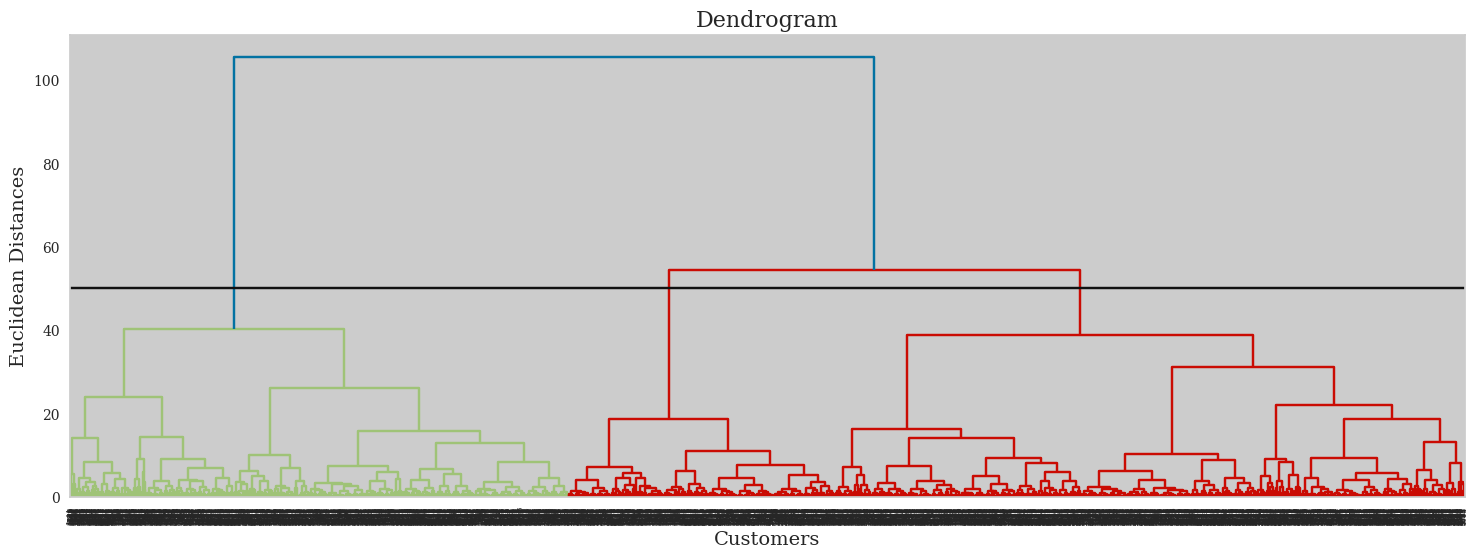

In [ ]:
# Dendrogram plot for the best cluster number
plt.figure(figsize = (18, 6))

# max_d is the cut-off/threshold value
max_d = 50
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.xlabel("Customers", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Euclidean Distances', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Dendrogram', fontname = 'serif', fontsize = 16)

# Cutting it at the threshold value
plt.axhline(y = max_d, c = 'k')
plt.show()

#### 1. Explain the ML Model and its performance?
#### A dendrogram is a tree-like diagram that records the sequences of merges or splits. The distance between vertical lines in the dendrogram represents the distance between clusters. We can set a threshold distance and draw a horizontal line; typically, we aim to set the threshold to cut the tallest vertical line, finding the largest vertical distance we can make without crossing any other horizontal line.

#### This technique is specific to the agglomerative hierarchical method of clustering. In this method, each point initially forms a separate cluster, and clusters are iteratively merged based on their distances in a hierarchical fashion.

#### To determine the optimal number of clusters for hierarchical clustering, we use a dendrogram, which visually displays the sequences of merges or splits of clusters. If two clusters are merged, the dendrogram represents this by joining them in a graph, and the height of the join represents the distance between those clusters.

### Agglomerative Clustering

In [ ]:
# Fitting the hierarchical clustering to the dataset
h_cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_h_cluster = h_cluster.fit_predict(X)

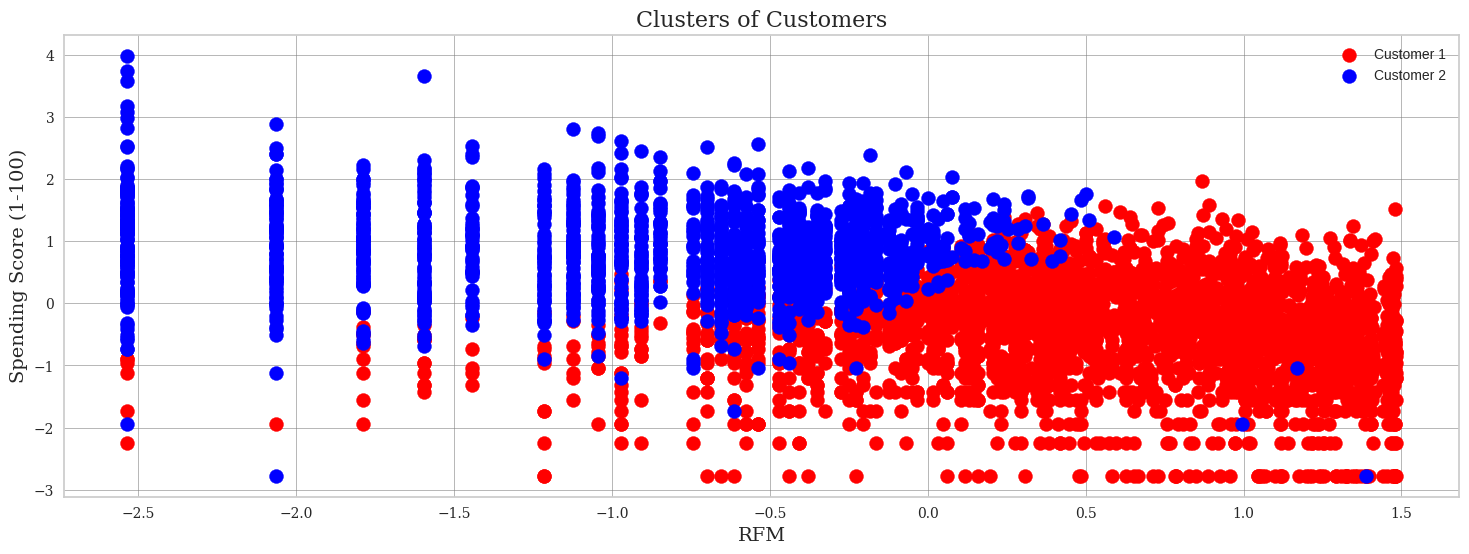

In [ ]:
# Visualizing clusters (2D only)
plt.figure(figsize = (18, 6))
plt.scatter(X[y_h_cluster == 0, 0], X[y_h_cluster == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_h_cluster == 1, 0], X[y_h_cluster == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("RFM", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Spending Score (1-100)', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Clusters of Customers', fontname = 'serif', fontsize = 16)
plt.legend()
plt.show()

#### 1. Explain the ML Model and its performance?
#### The agglomerative clustering is the most common type of hierarchical clustering used to group objects into clusters based on their similarity. It is also known as AGNES (Agglomerative Nesting). The algorithm begins by treating each object as a singleton cluster. Then, pairs of clusters are successively merged until all clusters have been merged into one large cluster containing all objects. The result is a tree-based representation of the objects, called a dendrogram.

### Implementing DBSCAN on Recency, Frequency, and Monetary

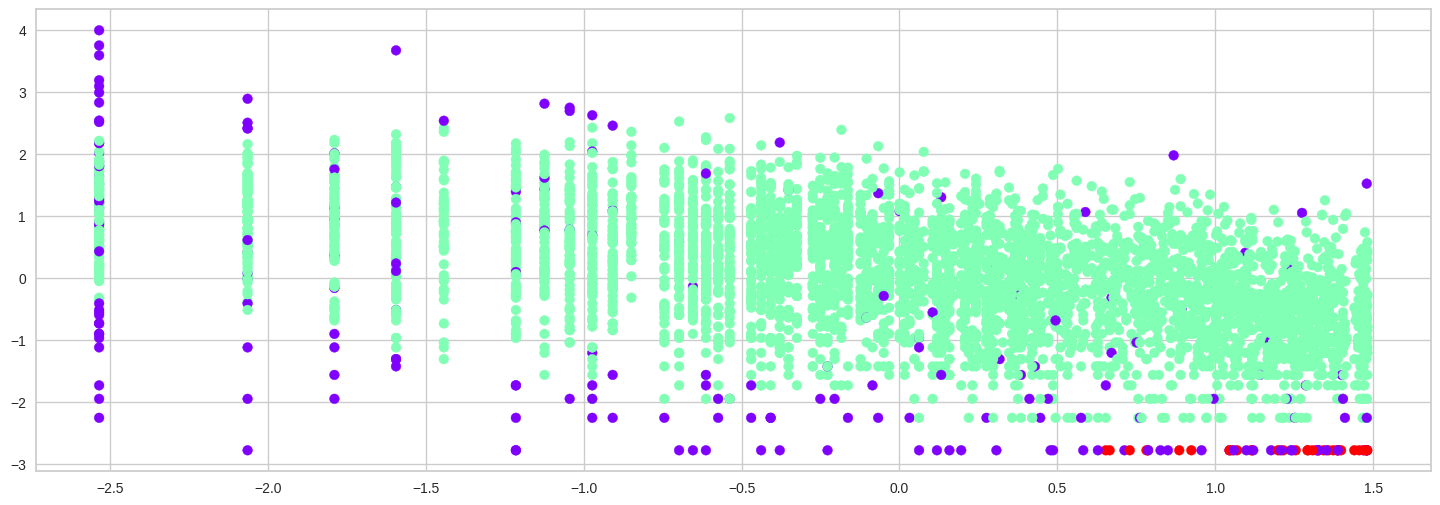

In [ ]:
# Applying DBSCAN on RFM
plt.figure(figsize = (18, 6))
y_pred = DBSCAN(eps = 0.5, min_samples = 15).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred, cmap = 'rainbow')
plt.show()

#### DBSCAN is able to segment our customers into three clusters

In [ ]:
# Create a table and specify the columns when initializing the table
summary_table = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"])

# Add rows to the table
summary_table.add_row(['1', "K-Means with silhouette score ", "RM", "2"])
summary_table.add_row(['2', "K-Means with Elbow method ", "RM", "2"])
summary_table.add_row(['3', "DBSCAN ", "RM", "3"])
summary_table.add_row(['4', "K-Means with silhouette_score ", "FM", "2"])
summary_table.add_row(['5', "K-Means with the Elbow method ", "FM", "2"])
summary_table.add_row(['6', "DBSCAN ", "FM", "3"])
summary_table.add_row(['7', "K-Means with silhouette_score ", "RFM", "2"])
summary_table.add_row(['8', "K-Means with Elbow method ", "RFM", "2"])
summary_table.add_row(['9', "Hierarchical clustering ", "RFM", "2"])
summary_table.add_row(['9', "Hierarchical clustering after the cutoff ", "RFM", "3"])
summary_table.add_row(['10', "DBSCAN ", "RFM", "3"])
print(summary_table)

+--------+-------------------------------------------+------+---------------------------+
| SL No. |                 Model_Name                | Data | Optimal_Number_of_cluster |
+--------+-------------------------------------------+------+---------------------------+
|   1    |       K-Means with silhouette score       |  RM  |             2             |
|   2    |         K-Means with Elbow method         |  RM  |             2             |
|   3    |                  DBSCAN                   |  RM  |             3             |
|   4    |       K-Means with silhouette_score       |  FM  |             2             |
|   5    |       K-Means with the Elbow method       |  FM  |             2             |
|   6    |                  DBSCAN                   |  FM  |             3             |
|   7    |       K-Means with silhouette_score       | RFM  |             2             |
|   8    |         K-Means with Elbow method         | RFM  |             2             |
|   9    |

### 1. Which evaluation metrics did you consider for a positive business impact and why?
### I will consider the Silhouette score for a positive business impact because it provides a score that quantifies the quality of clustering, and we can visualize how the clusters are being formed for different Silhouette scores.

### 2. Which ML model did you choose from the above-created models as your final prediction model and why?
### I will use the K-means model because it allows us to cluster the data into different groups in a convenient way, enabling us to discover categories of groups in the unlabeled dataset on its own without the need for any training.

# **Conclusion**

#### Following are the conclusions made during EDA:

#### 1. Top Five Countries: United Kingdom, Germany, France, Ireland, and Spain.
#### 2. Months with maximum business: November, October, December, September, and May.
#### 3. Maximum purchasing on different days: Thursday > Wednesday > Tuesday > Monday > Saturday > Friday.
#### 4. Most customers usually purchase products between 10:00 A.M. to 3:00 P.M.
#### 5. The company should ensure that the website server is up and running during these hours and also invest in customer support.
#### 6. White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, and Jumbo Bag Red Retrospot were ordered with the top three highest frequencies. The company is advised to keep the inventory stocked with these products.
#### 7. Glass and Beads Bracelet Ivory, Crochet Lilac/Red Bear Keyring, and Pink Baroque Flock Candle Holder were ordered in the lowest numbers.
#### 8. A number of customers also cancelled their orders. The company should investigate this further.
#### 9. Given data for customer segmentation shows that many variables like StockCode and Description are irrelevant and have no relation.
#### 10. After applying Elbow and Silhouette score, the optimal cluster size is found to be 3 or 2.
#### 11. Similar results were obtained with Dendrogram results of KMeans clusters; centers in plots appear better than Hierarchical Agglomerative Clustering.

#### **Cluster_0 CustomerIDs take more time gaps between each order they place (rarely).**

#### **Cluster_1 CustomerIDs make bulk purchases consistently, leading to high spending (retailers).**

#### **Cluster_2 CustomerIDs have the highest number of orders placed (small shops with less inventory).**

#### 12. To conclude, we demonstrated how to segment our customers based on our business requirements. RFM analysis can be applied to the entire customer base or just a subset. For instance, customers can be initially segmented based on geographical area or other demographics, followed by RFM for historical transaction-based behavior segments. RFM analysis can provide insights into various aspects of customer behavior, enabling companies to formulate marketing strategies, retain slipping customers, and provide personalized recommendations based on their interests. We utilized the K-means algorithm to segment our customers into clusters with similar characteristics, and K-means performed well in this task.

#### **How is your project useful to stakeholders?**

##### The project helps the company improve its business by understanding income levels, identifying the highest-selling products, and analyzing customer demographics based on their country of residence. By considering these factors, the company can tailor its product offerings to meet customer needs and target regions where wholesalers are most prevalent, thereby increasing sales and optimizing business operations.

### **Hurrah! You have successfully completed your Machine Learning Capstone Project!**